## Problem Statement
- Identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc
- Identify the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

## 1. Importing the libraries needed for the EDA and setting up the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### 1.1. Defining custom functions/classes that are going to be used throughout the EDA for various purposes

In [2]:
class missing_value:
    
    def __init__(self):
        return None
        
        
    def percentages(self,df):
        
        '''
        This function takes 1 argument.
        
        df : Name of the DataFrame/Series to analyze. 
             Either pass the whole DataFrame OR selected columns of the DataFrame
             
        The output will show percentages of missing values those are > 2% for each column(s) in the df.
        '''
        
        self._df = df
        
        tempdf = self._df.isnull().sum().sort_values(ascending=False)/self._df.shape[0] * 100
        
        return tempdf[tempdf > 2].copy()
    
    
    def columns_to_drop(self, data, percent):
        
        '''
        This function takes 2 arguments.
        
        data : Dataframe whose columns are to be dropped above the percentage decided by you.
        
        percent : Pass a value in percentage unit to drop e.g. 30
        
        The output will return a copy of the passed DataFrame 
        with columns whose missing value percentages are > percent provided by you.
        '''
        self._data = data
        self._percent = percent
        
        drop_cols = self.percentages(self._data)
        
        columns_to_drop = list(drop_cols[drop_cols > self._percent].index)
        
        return self._df.drop(columns_to_drop, axis=1)

In [3]:
analyze_missing = missing_value()

## 2. Loading the Dataset (1 of 2)

In [4]:
df_application_data = pd.read_csv("application_data.csv")

### 2.1 Inspecting The Dataframe

In [5]:
df_application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df_application_data.shape

(307511, 122)

 - Out of the 122 features, checking what percentage of missing values they have so as to determine further course of action.

In [7]:
analyze_missing.percentages(df_application_data)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

 - Dropping columns where missing values are > 40%

In [8]:
appli_data_filtered = analyze_missing.columns_to_drop(df_application_data,40)

In [9]:
appli_data_filtered.shape

(307511, 73)

In [10]:
number_of_columns_dropped = df_application_data.shape[1] - appli_data_filtered.shape[1]
number_of_columns_dropped

49

 - Taking note of the columns where, at a later stage missing value imputations are to be done as necessary.

In [11]:
analyze_missing.percentages(appli_data_filtered)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
dtype: float64

### Checking Data types, Data Wrangling and Missing value Imputations

 - Missing value imputation and datatye corrections will be done simultaneously

In [12]:
appli_data_filtered.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [13]:
appli_data_filtered.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449

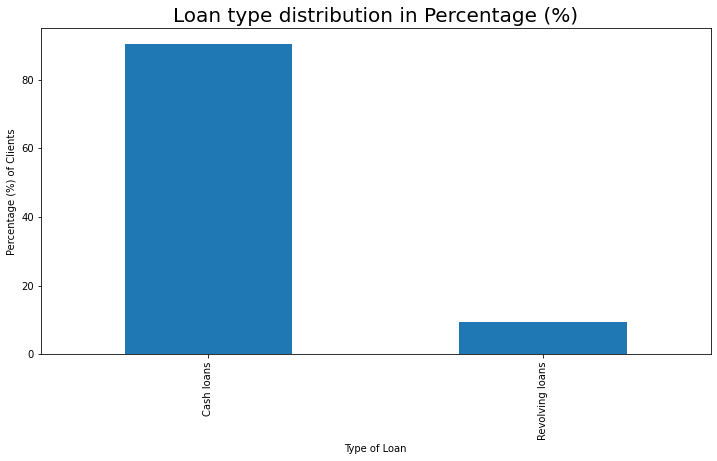

In [14]:
plt.figure(figsize=[12,6])
plt.title("Loan type distribution in Percentage (%)", fontsize=20)
plt.xlabel('Type of Loan')
plt.ylabel('Percentage (%) of Clients')
(appli_data_filtered['NAME_CONTRACT_TYPE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- We observe cash loans are around 90% and Revolving loans are around 10%

In [15]:
appli_data_filtered['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

 - There is no mention of **XNA** in the data dictionary against this column. Since, the number of data points for this XNA class is minuscle in comparison to the **Female (F)** and **Male (M)** gender and more over Female gender being predominant, **XNA** is being changed to **F**. 

In [16]:
#Replacing XNA to F
appli_data_filtered['CODE_GENDER'].replace(['XNA', 'F', 'M'], ['Female', 'Female', 'Male'], inplace=True)

In [17]:
appli_data_filtered['CODE_GENDER'].value_counts()

Female    202452
Male      105059
Name: CODE_GENDER, dtype: int64

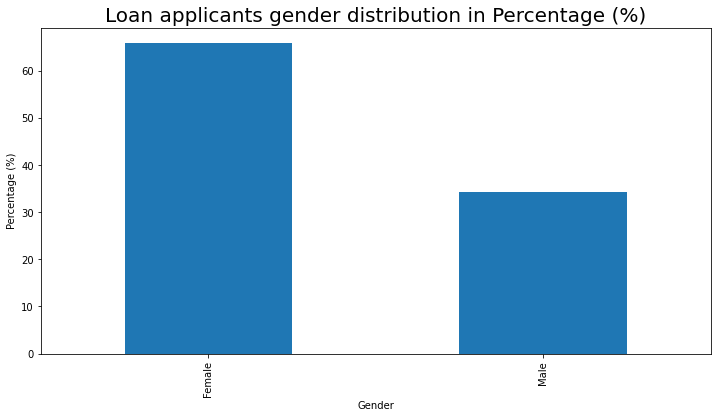

In [18]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants gender distribution in Percentage (%)", fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
(appli_data_filtered['CODE_GENDER'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- From the above figure we can infer that **majority of loan applicants are Female**

In [19]:
appli_data_filtered['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

In [20]:
appli_data_filtered['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [21]:
appli_data_filtered['FLAG_OWN_CAR'].replace(['Y', 'N'],['Yes', 'No'], inplace=True)

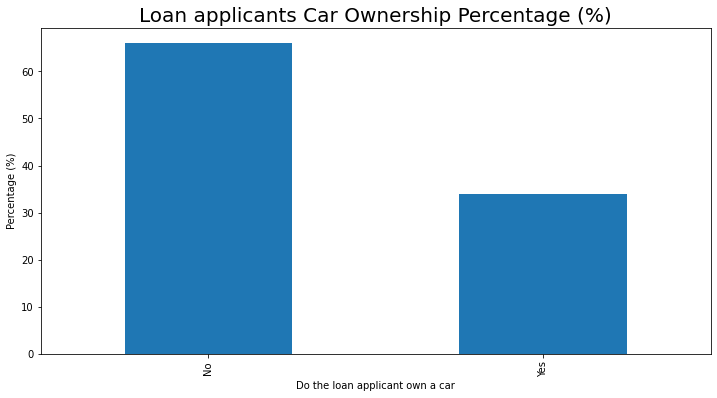

In [22]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants Car Ownership Percentage (%)", fontsize=20)
plt.xlabel('Do the loan applicant own a car')
plt.ylabel('Percentage (%)')
(appli_data_filtered['FLAG_OWN_CAR'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- From the above figure we can infer that **majority of loan applicants do not own a car**

In [23]:
appli_data_filtered['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
appli_data_filtered['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [25]:
appli_data_filtered['FLAG_OWN_REALTY'].replace(['Y', 'N'],['Yes', 'No'], inplace=True)

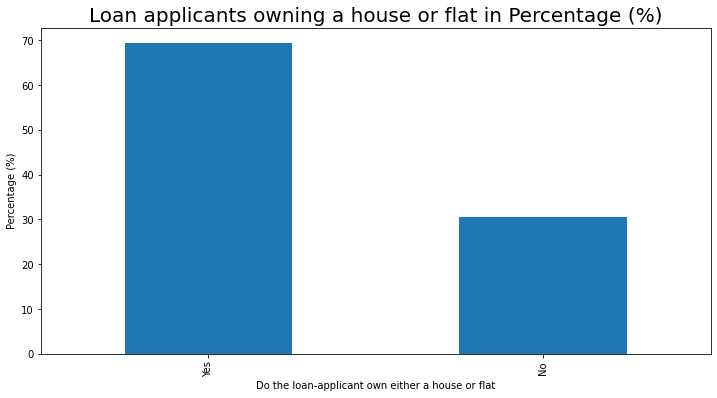

In [26]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants owning a house or flat in Percentage (%)", fontsize=20)
plt.xlabel('Do the loan-applicant own either a house or flat')
plt.ylabel('Percentage (%)')
(appli_data_filtered['FLAG_OWN_REALTY'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- From the above figure we can infer that **majority of loan applicants either own a house or flat**

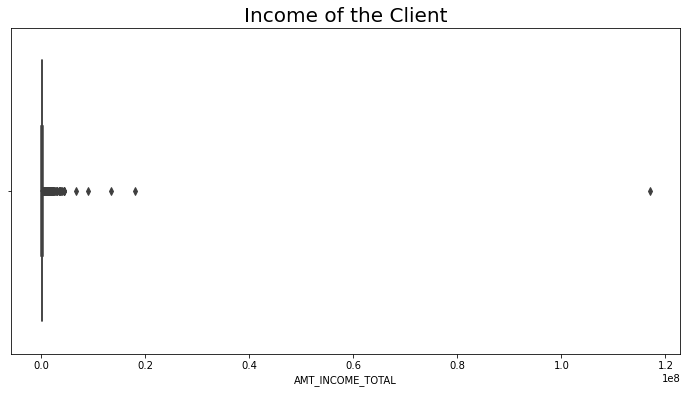

In [27]:
plt.figure(figsize=[12,6])
plt.title("Income of the Client", fontsize=20)
sns.boxplot(data=appli_data_filtered, x='AMT_INCOME_TOTAL')
plt.show()

In [28]:
appli_data_filtered['AMT_INCOME_TOTAL'].quantile([0, 0.2, 0.5, 0.8, 0.95, 0.99, 1])

0.00        25650.0
0.20        99000.0
0.50       147150.0
0.80       225000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

- We can see the presence of outlier in the **AMT_INCOME_TOTAL** column. There is a huge difference between the 99th percentile and max value also indicating that it is a outlier.

Binning **AMT_INCOME_TOTAL** and creating a **CLIENT_INCOME_RANGE** variable from it for further analysis.

In [29]:
appli_data_filtered['CLIENT_INCOME_RANGE'] = pd.qcut(appli_data_filtered['AMT_INCOME_TOTAL'], q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['25k-1L', '1L-1.47L', "1.47L-2.25L", '2.25L-3.37L', '3.37L+'])
appli_data_filtered.loc[:,['AMT_INCOME_TOTAL','CLIENT_INCOME_RANGE']].head(10)#For checking sanity of the binning.

,AMT_INCOME_TOTAL,CLIENT_INCOME_RANGE
0,202500.0,1.47L-2.25L
1,270000.0,2.25L-3.37L
2,67500.0,25k-1L
3,135000.0,1L-1.47L
4,121500.0,1L-1.47L
5,99000.0,25k-1L
6,171000.0,1.47L-2.25L
7,360000.0,3.37L+
8,112500.0,1L-1.47L
9,135000.0,1L-1.47L


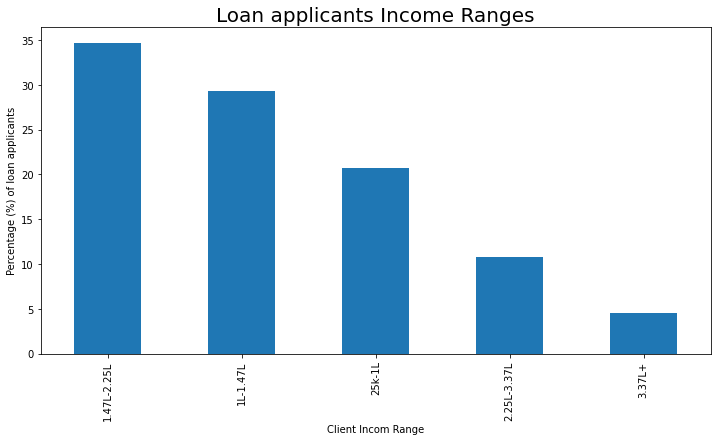

In [30]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants Income Ranges", fontsize=20)
plt.xlabel('Client Incom Range')
plt.ylabel('Percentage (%) of loan applicants')
(appli_data_filtered['CLIENT_INCOME_RANGE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- From the above chart we can see that in total around **64% of the loan applicants** has their **income between 1 lacs to 2.25 lacs**.

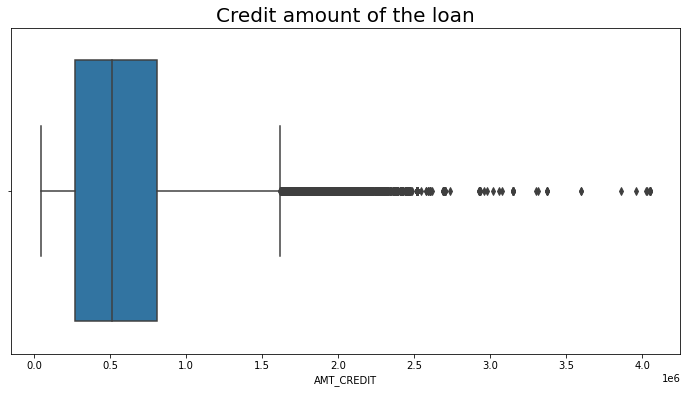

In [31]:
plt.figure(figsize=[12,6])
plt.title("Credit amount of the loan", fontsize=20)
sns.boxplot(data=appli_data_filtered, x='AMT_CREDIT')
plt.show()

- There are few higher values clustered at the top end, let's check them out.

In [32]:
appli_data_filtered['AMT_CREDIT'].quantile([0, 0.2, 0.5, 0.8, 0.95, 0.99, 1])

0.00      45000.0
0.20     254700.0
0.50     513531.0
0.80     900000.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [33]:
appli_data_filtered.loc[appli_data_filtered['AMT_CREDIT'] == 4050000.0,['AMT_CREDIT','AMT_GOODS_PRICE']]

,AMT_CREDIT,AMT_GOODS_PRICE
14852,4050000.0,4050000.0
17948,4050000.0,4050000.0
110459,4050000.0,4050000.0
119681,4050000.0,4050000.0
120757,4050000.0,4050000.0
133766,4050000.0,4050000.0
287732,4050000.0,4050000.0
288455,4050000.0,4050000.0


- As we can see the goods prices were higher, so the loan amount credit was also higher.

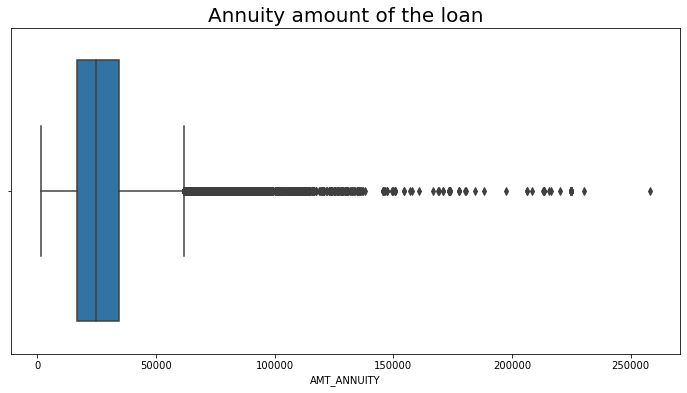

In [34]:
plt.figure(figsize=[12,6])
plt.title("Annuity amount of the loan", fontsize=20)
sns.boxplot(data=appli_data_filtered, x='AMT_ANNUITY')
plt.show()

In [35]:
appli_data_filtered['AMT_ANNUITY'].quantile([0, 0.2, 0.5, 0.8, 0.95, 0.99, 1])

0.00      1615.5
0.20     14701.5
0.50     24903.0
0.80     37516.5
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

- We can see the presence of outlier in the **AMT_ANNUITY** column as per it's _own data distribution_. There is a huge difference between the 99th percentile and max value also indicating that it is a outlier.
- It's also true that, as seen earlier, for some clients the goods prices were higher, so the loan amount credit was also higher, thus annuity ammount would also be higher.

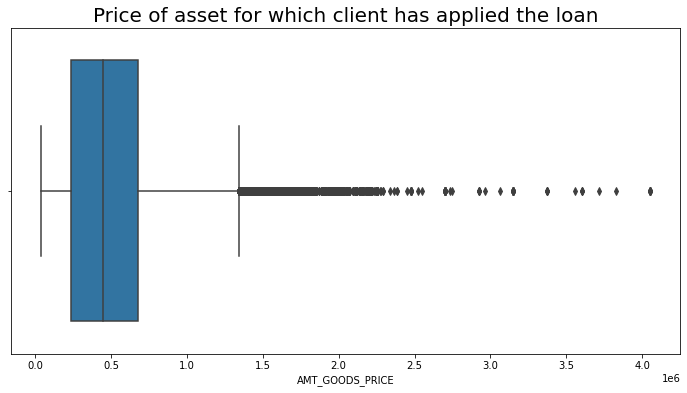

In [36]:
plt.figure(figsize=[12,6])
plt.title("Price of asset for which client has applied the loan", fontsize=20)
sns.boxplot(data=appli_data_filtered, x='AMT_GOODS_PRICE')
plt.show()

In [37]:
appli_data_filtered['AMT_GOODS_PRICE'].quantile([0, 0.2, 0.5, 0.8, 0.95, 0.99, 1])

0.00      40500.0
0.20     225000.0
0.50     450000.0
0.80     814500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

- No outlier detected in the **AMT_GOODS_PRICE** column as per it's _own data distribution.

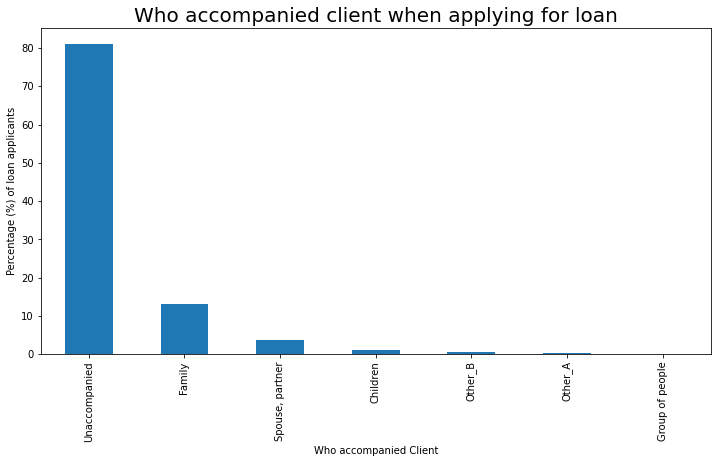

In [38]:
plt.figure(figsize=[12,6])
plt.title("Who accompanied client when applying for loan", fontsize=20)
plt.xlabel('Who accompanied Client')
plt.ylabel('Percentage (%) of loan applicants')
(appli_data_filtered['NAME_TYPE_SUITE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- We can observe from the trend that 80% of loan applicants has come alone when applying for loan followed by family members and Spouse/Partner. Only less than 1% people was accompanied by group of people or pleople identified as Other_A and Other_B in the dataset.

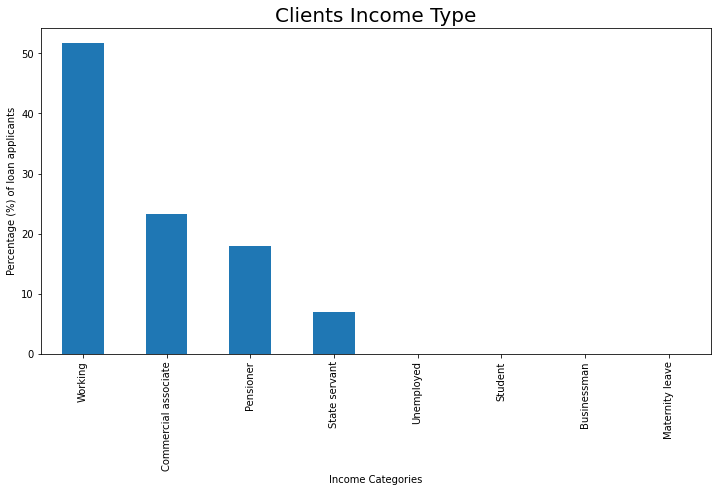

In [39]:
plt.figure(figsize=[12,6])
plt.title("Clients Income Type", fontsize=20)
plt.xlabel('Income Categories')
plt.ylabel('Percentage (%) of loan applicants')
(appli_data_filtered['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- We can observe from the trend that for 51% of the loan applicant, income type is Working followed by Commercial associate, Pensioner and State Servant at 23%, 18% and 7% respectively. Only less than 1% of the applicants are Unemployed, Student, Businessman or on Maternity Leave.

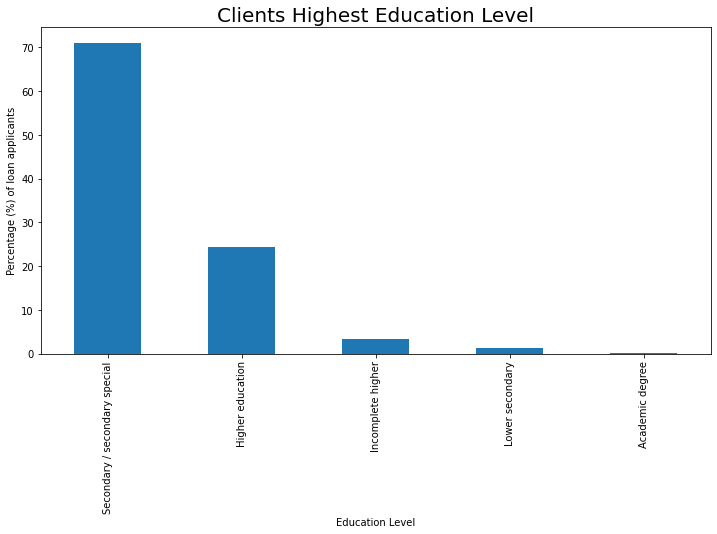

In [40]:
plt.figure(figsize=[12,6])
plt.title("Clients Highest Education Level", fontsize=20)
plt.xlabel('Education Level')
plt.ylabel('Percentage (%) of loan applicants')
(appli_data_filtered['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- We can see from the chart that in **total 96% of the applicants** have either Secondary/secondary special or Higher education. Only 4% of the applicants have Incomplete higher, Lower secondary or Academic degrees.

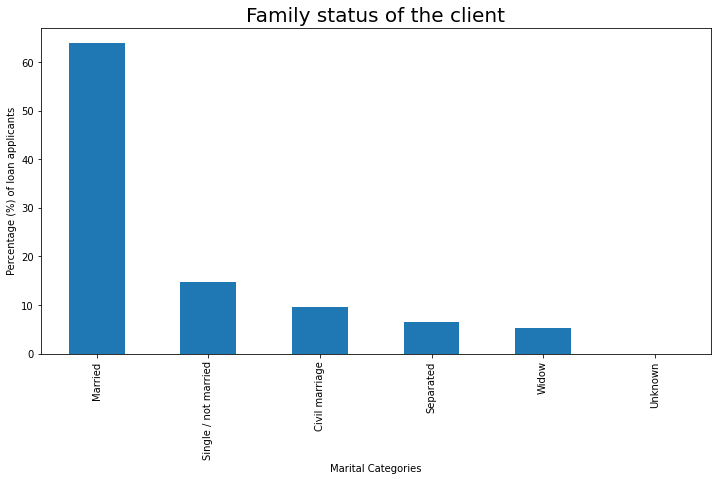

In [41]:
plt.figure(figsize=[12,6])
plt.title("Family status of the client", fontsize=20)
plt.xlabel('Marital Categories')
plt.ylabel('Percentage (%) of loan applicants')
(appli_data_filtered['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- We observe that majority of the applicants are married or had married at some point in time, only 14% are single. For less than 1% of the data Marital Status is unknown.

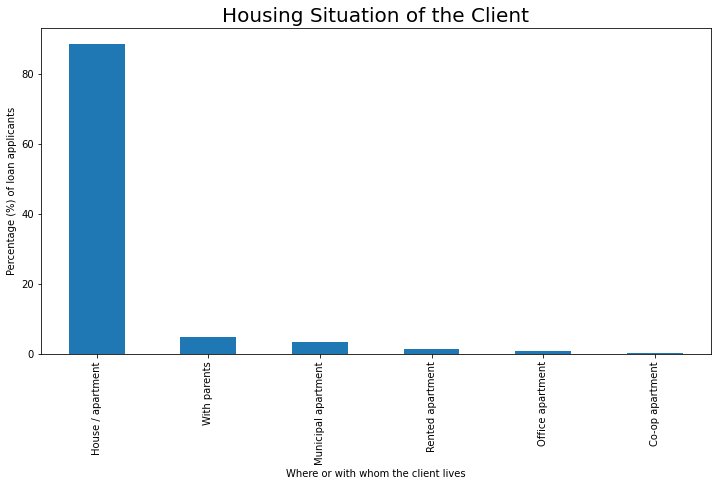

In [42]:
plt.figure(figsize=[12,6])
plt.title("Housing Situation of the Client", fontsize=20)
plt.xlabel('Where or with whom the client lives')
plt.ylabel('Percentage (%) of loan applicants')
(appli_data_filtered['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- We see that majority of the applicant live in a House/Apartment. It's also corroborated by the fact that majority of our applicant owns a house or flat as we have seen when exploring the FLAG_OWN_REALTY feature.

Converting columns **DAYS_BIRTH** to **DAYS_ID_PUBLISH** which don't have any missing values to positive number. For further convertion.

In [43]:
appli_data_filtered.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'] = appli_data_filtered.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'].apply(lambda x: abs(x))

In [44]:
appli_data_filtered.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_INCOME_RANGE
0,100002,1,Cash loans,Male,No,Yes,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.47L-2.25L
1,100003,0,Cash loans,Female,No,No,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.25L-3.37L
2,100004,0,Revolving loans,Male,Yes,Yes,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,25k-1L
3,100006,0,Cash loans,Female,No,Yes,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1L-1.47L
4,100007,0,Cash loans,Male,No,Yes,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-1.47L
5,100008,0,Cash loans,Male,No,Yes,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,25k-1L
6,100009,0,Cash loans,Female,Yes,Yes,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,1.47L-2.25L
7,100010,0,Cash loans,Male,Yes,Yes,0,360000.0,153

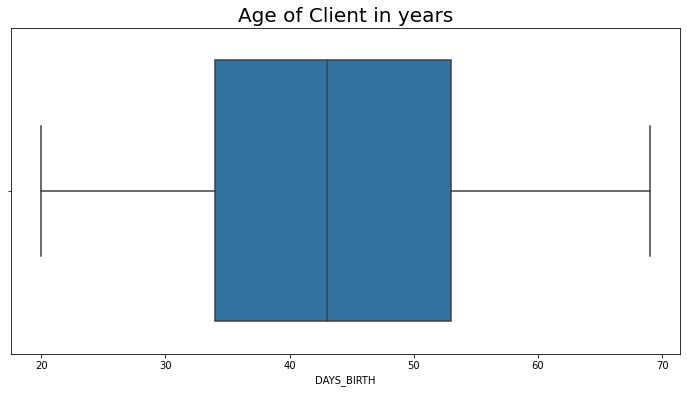

In [45]:
plt.figure(figsize=[12,6])
plt.title("Age of Client in years", fontsize=20)
sns.boxplot(appli_data_filtered['DAYS_BIRTH'].apply(lambda x: int(x/365)))
plt.show()

Seems to have no outlier in the **DAYS_BIRTH** column

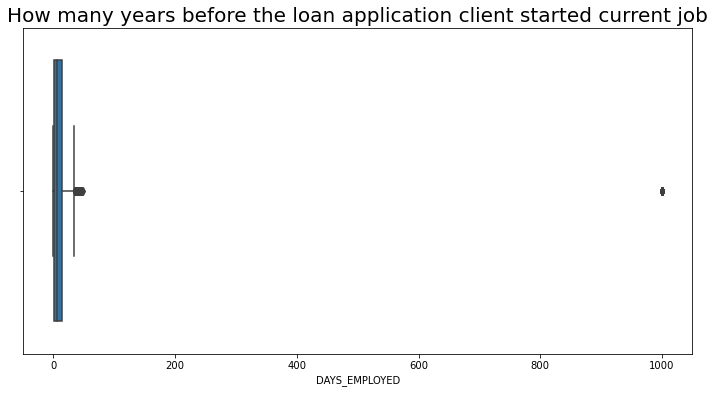

In [46]:
plt.figure(figsize=[12,6])
plt.title("How many years before the loan application client started current job", fontsize=20)
sns.boxplot(appli_data_filtered['DAYS_EMPLOYED'].apply(lambda x: int(x/365)))
plt.show()

Outlier observed in the **DAYS_EMPLOYED** column

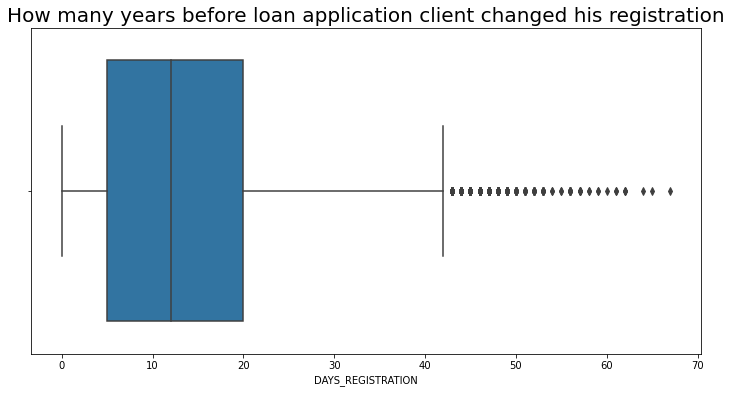

In [47]:
plt.figure(figsize=[12,6])
plt.title("How many years before loan application client changed his registration", fontsize=20)
sns.boxplot(appli_data_filtered['DAYS_REGISTRATION'].apply(lambda x: int(x/365)))
plt.show()

Outlier observed in the **DAYS_REGISTRATION** column

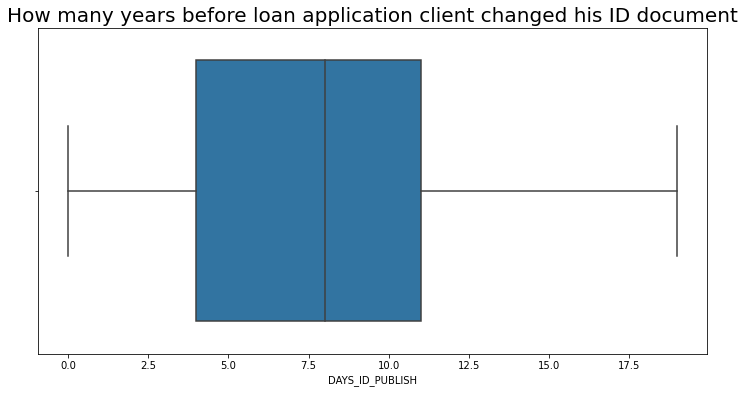

In [48]:
plt.figure(figsize=[12,6])
plt.title("How many years before loan application client changed his ID document", fontsize=20)
sns.boxplot(appli_data_filtered['DAYS_ID_PUBLISH'].apply(lambda x: int(x/365)))
plt.show()

Seems to have no outlier in the **DAYS_ID_PUBLISH** column

In [49]:
#Converting DAYS_LAST_PHONE_CHANGE to positive values.
appli_data_filtered['DAYS_LAST_PHONE_CHANGE'] = appli_data_filtered['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x))

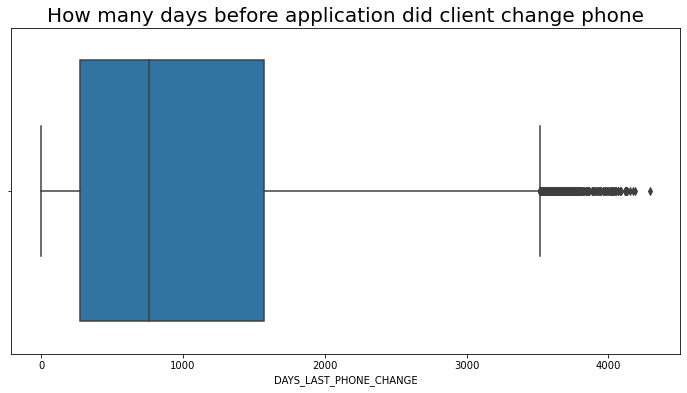

In [50]:
plt.figure(figsize=[12,6])
plt.title("How many days before application did client change phone", fontsize=20)
sns.boxplot(appli_data_filtered['DAYS_LAST_PHONE_CHANGE'])
plt.show()

- No outlier detected in the **DAYS_LAST_PHONE_CHANGE** column as per it's _own data distribution_.

Running sanity check on **DAYS_BIRTH**, **DAYS_EMPLOYED**, **DAYS_REGISTRATION**, **DAYS_ID_PUBLISH** and **DAYS_LAST_PHONE_CHANGE**

In [51]:
appli_data_filtered[(appli_data_filtered['DAYS_BIRTH'] < appli_data_filtered['DAYS_EMPLOYED'])].shape[0]

55374

**That is a problem** as DAYS_BIRTH cannot be less than anything.

In [52]:
appli_data_filtered[(appli_data_filtered['DAYS_BIRTH'] < appli_data_filtered['DAYS_EMPLOYED'])]['DAYS_EMPLOYED'].unique()

array([365243])

In [53]:
appli_data_filtered.shape[0]

307511

As evident from above **a value of 365243** is entered at **55374 places** in the **DAYS_EMPLOYED** column (around 18%) of the total data in that column

To correct the issue I'm replacing it by the median value of the DAYS_EMPLOYED column

In [54]:
DAYS_EMPLOYED_median = appli_data_filtered['DAYS_EMPLOYED'].median()

In [55]:
appli_data_filtered.loc[appli_data_filtered['DAYS_EMPLOYED'] == 365243,['DAYS_EMPLOYED']] = int(DAYS_EMPLOYED_median)

In [56]:
#checking whether imputation has happened correctly or not
appli_data_filtered[(appli_data_filtered['DAYS_BIRTH'] < appli_data_filtered['DAYS_EMPLOYED'])].shape[0]

0

In [57]:
appli_data_filtered[(appli_data_filtered['DAYS_BIRTH'] < appli_data_filtered['DAYS_REGISTRATION'])].shape

(1, 74)

In [58]:
appli_data_filtered[(appli_data_filtered['DAYS_BIRTH'] < appli_data_filtered['DAYS_REGISTRATION'])]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_INCOME_RANGE
266366,408583,0,Cash loans,Female,Yes,No,2,157500.0,455040.0,12132.0,360000.0,NaN,Working,Secondary / secondary special,Married,House / apartment,0.031329,10116,1256,10116.041667,2715,1,1,0,1,0,0,Sales staff,4.0,2,2,TUESDAY,14,0,0,0,0,1,1,Business Entity Type 3,0.434526,0.256706,1.0,0.0,1.0,0.0,1569.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0,1.47L-2.25L


One value of DAYS_REGISTRATION column appears to be greater than DAYS_BIRTH column and is in float representation.
DAYS_REGISTRATION column has been converted to int64 to rectify the issue.

In [59]:
appli_data_filtered['DAYS_REGISTRATION'] = appli_data_filtered['DAYS_REGISTRATION'].astype({'DAYS_REGISTRATION': 'int64'})

In [60]:
appli_data_filtered[(appli_data_filtered['DAYS_BIRTH'] < appli_data_filtered['DAYS_ID_PUBLISH'])].shape[0]

0

In [61]:
appli_data_filtered[(appli_data_filtered['DAYS_BIRTH'] < appli_data_filtered['DAYS_LAST_PHONE_CHANGE'])].shape[0]

0

A new column **CLIENT_AGE_YRS** has been calculated for EDA from **DAYS_BIRTH** for easy processing

In [62]:
appli_data_filtered['CLIENT_AGE_YRS'] = appli_data_filtered['DAYS_BIRTH'].apply(lambda x: int(x/365))

- **Binning** CLIENT_AGE_YRS into CLIENT_AGE_GROUP for greater insight about the spread of age groups inour loan applicant dataset.

In [63]:
appli_data_filtered['CLIENT_AGE_GROUP'] = pd.cut(appli_data_filtered['CLIENT_AGE_YRS'], bins=[0, 30, 40, 50, 60, 9999], labels=['<30','30-40','40-50','50-60','60+'])
appli_data_filtered.loc[:,['CLIENT_AGE_YRS','CLIENT_AGE_GROUP']].head(10)

,CLIENT_AGE_YRS,CLIENT_AGE_GROUP
0,25,<30
1,45,40-50
2,52,50-60
3,52,50-60
4,54,50-60
5,46,40-50
6,37,30-40
7,51,50-60
8,55,50-60
9,39,30-40


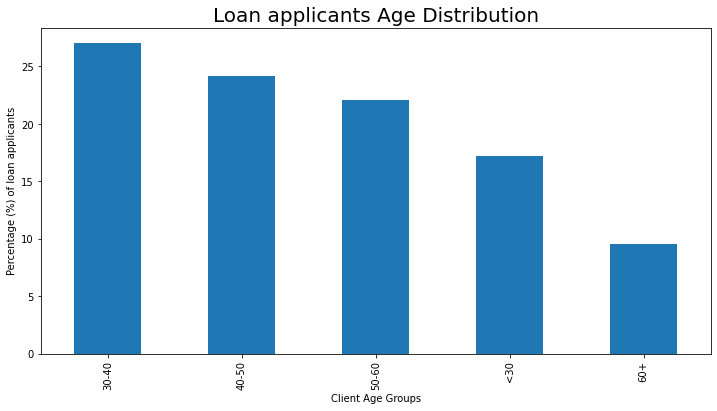

In [64]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants Age Distribution", fontsize=20)
plt.xlabel('Client Age Groups')
plt.ylabel('Percentage (%) of loan applicants')
(appli_data_filtered['CLIENT_AGE_GROUP'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- Fantastic trend, 30-40 are the highest loan applicants and as age is increasing loan application percentage is decreasing.

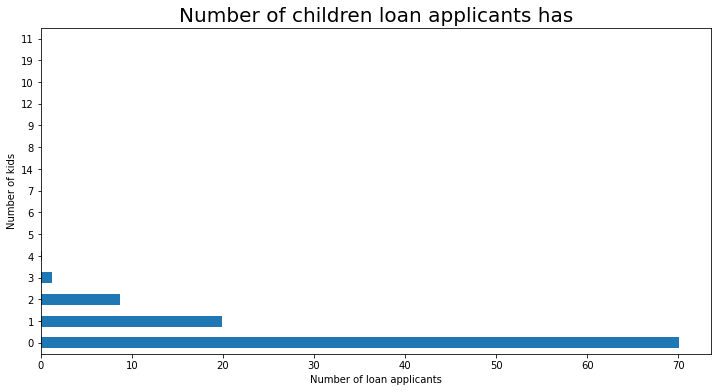

In [65]:
plt.figure(figsize=[12,6])
plt.title("Number of children loan applicants has", fontsize=20)
plt.ylabel('Number of kids')
plt.xlabel('Number of loan applicants')
(appli_data_filtered['CNT_CHILDREN'].value_counts(normalize=True, dropna=False)*100).plot.barh()
plt.show()

In [66]:
appli_data_filtered['CLIENT_AGE_YRS'].median()

43.0

In [67]:
appli_data_filtered['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

- On checking the value counts we can clearly access that there are outliers in CNT_CHILDREN column. The median age of applicants in this dataset is 43 and it does not tally with the abysmally high children count.

In [68]:
appli_data_filtered.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'] = appli_data_filtered.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].apply(lambda x: np.where(x == 1, 'Yes', 'No'))

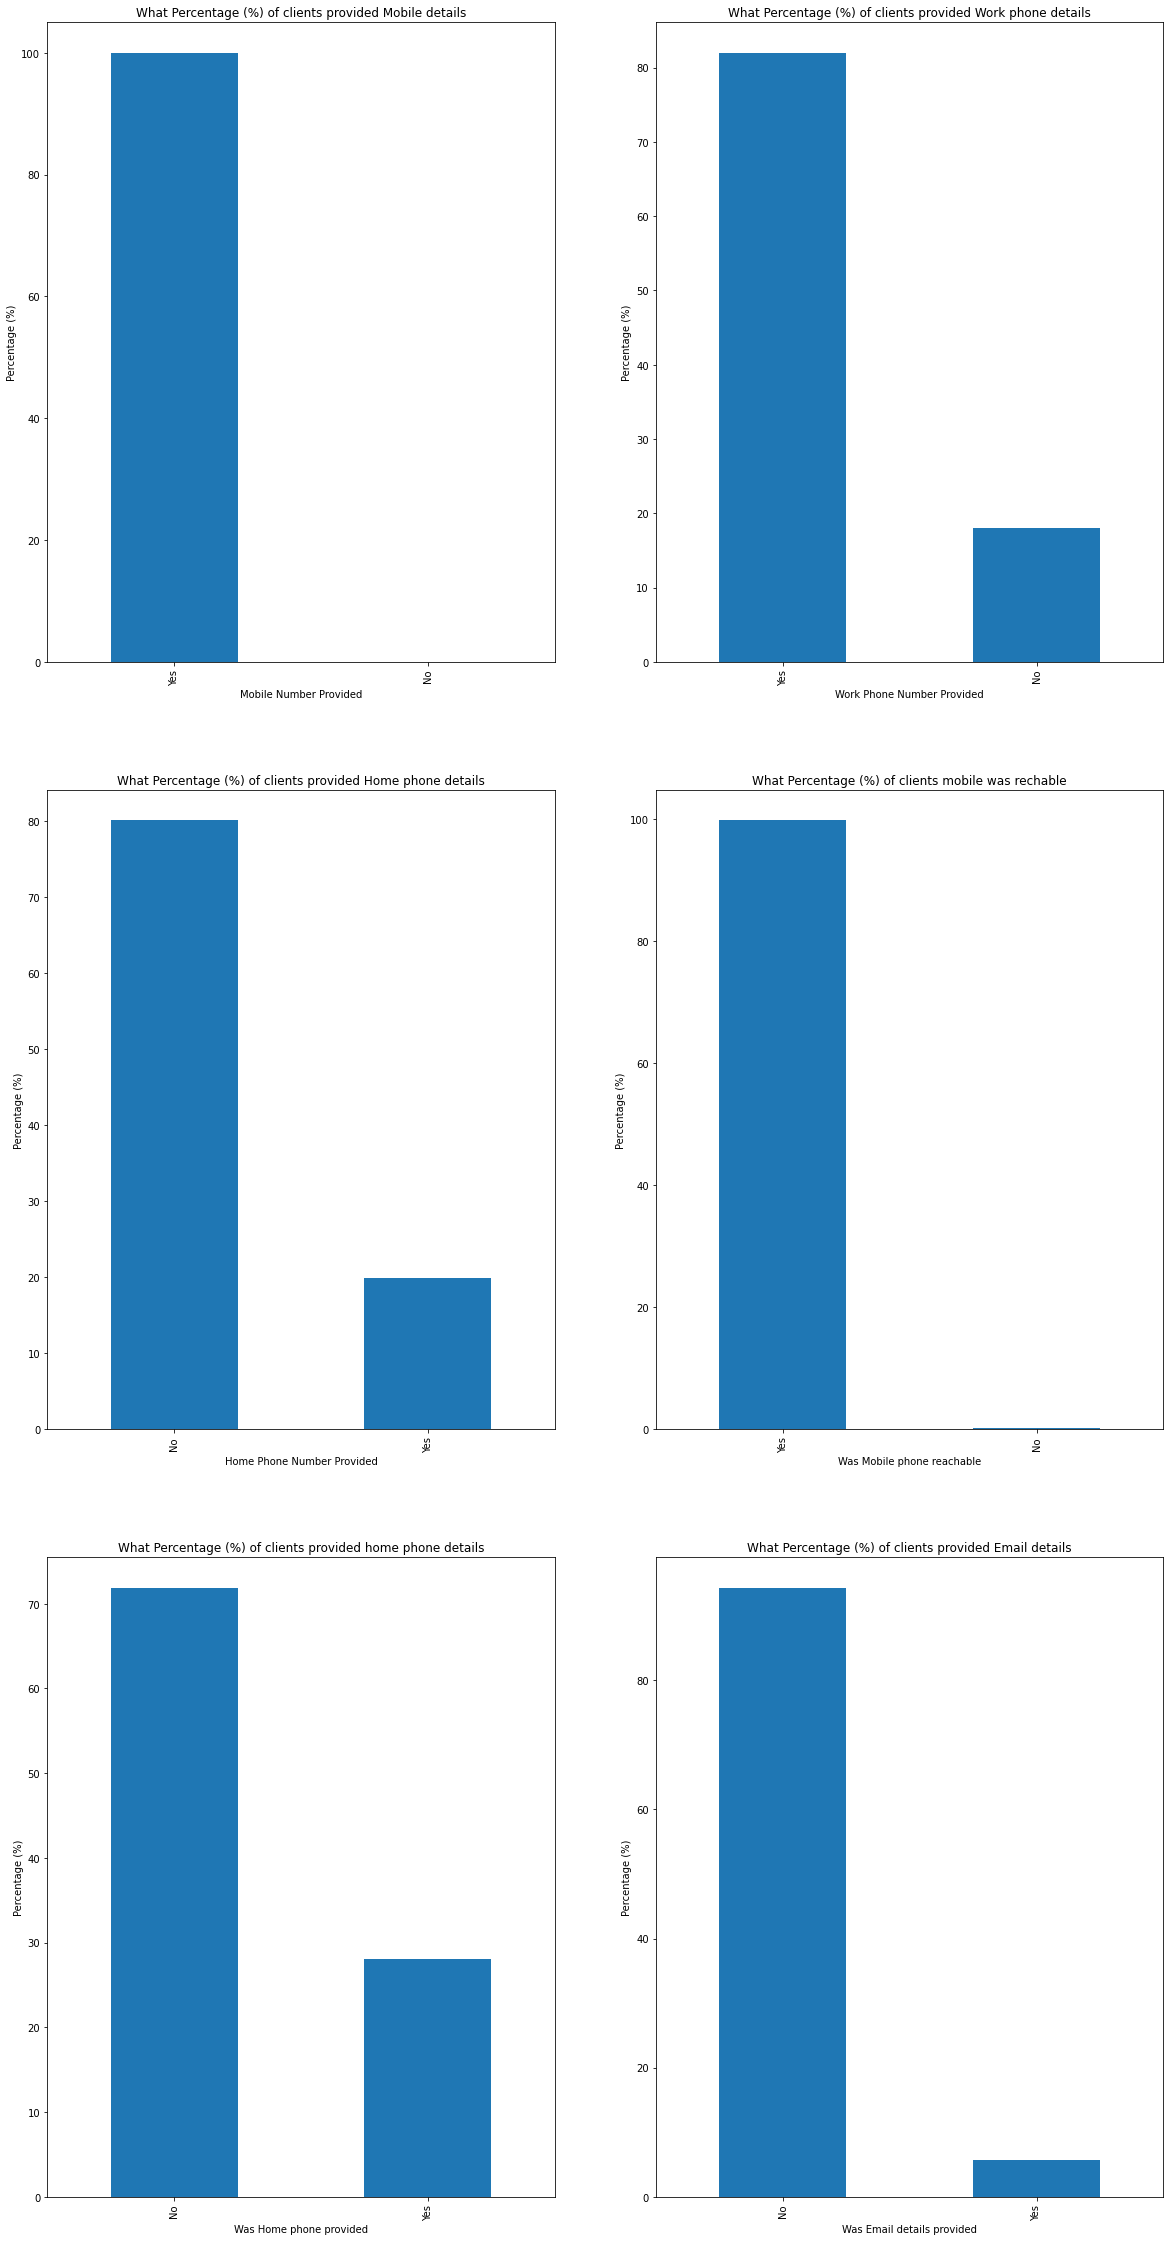

In [69]:
plt.figure(figsize=[20,40])
plt.subplot(3,2,1)
plt.title("What Percentage (%) of clients provided Mobile details", fontsize=12)
plt.xlabel('Mobile Number Provided')
plt.ylabel('Percentage (%)')
plt.yscale
(appli_data_filtered['FLAG_MOBIL'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,2)
plt.title("What Percentage (%) of clients provided Work phone details", fontsize=12)
plt.xlabel('Work Phone Number Provided')
plt.ylabel('Percentage (%)')
(appli_data_filtered['FLAG_EMP_PHONE'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,3)
plt.title("What Percentage (%) of clients provided Home phone details", fontsize=12)
plt.xlabel('Home Phone Number Provided')
plt.ylabel('Percentage (%)')
(appli_data_filtered['FLAG_WORK_PHONE'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,4)
plt.title("What Percentage (%) of clients mobile was rechable", fontsize=12)
plt.xlabel('Was Mobile phone reachable')
plt.ylabel('Percentage (%)')
(appli_data_filtered['FLAG_CONT_MOBILE'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,5)
plt.title("What Percentage (%) of clients provided home phone details", fontsize=12)
plt.xlabel('Was Home phone provided')
plt.ylabel('Percentage (%)')
(appli_data_filtered['FLAG_PHONE'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,6)
plt.title("What Percentage (%) of clients provided Email details", fontsize=12)
plt.xlabel('Was Email details provided')
plt.ylabel('Percentage (%)')
(appli_data_filtered['FLAG_EMAIL'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [70]:
appli_data_filtered.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'] = appli_data_filtered.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].apply(lambda x: np.where(x == 1, 'Yes', 'No'))

In [71]:
appli_data_filtered.loc[:,'REG_REGION_NOT_LIVE_REGION':'LIVE_REGION_NOT_WORK_REGION'] = appli_data_filtered.loc[:,'REG_REGION_NOT_LIVE_REGION':'LIVE_REGION_NOT_WORK_REGION'].apply(lambda x: np.where(x == 1, 'Different', 'Same'))

In [72]:
appli_data_filtered.loc[:,'REG_CITY_NOT_LIVE_CITY':'LIVE_CITY_NOT_WORK_CITY'] = appli_data_filtered.loc[:,'REG_CITY_NOT_LIVE_CITY':'LIVE_CITY_NOT_WORK_CITY'].apply(lambda x: np.where(x == 1, 'Different', 'Same'))

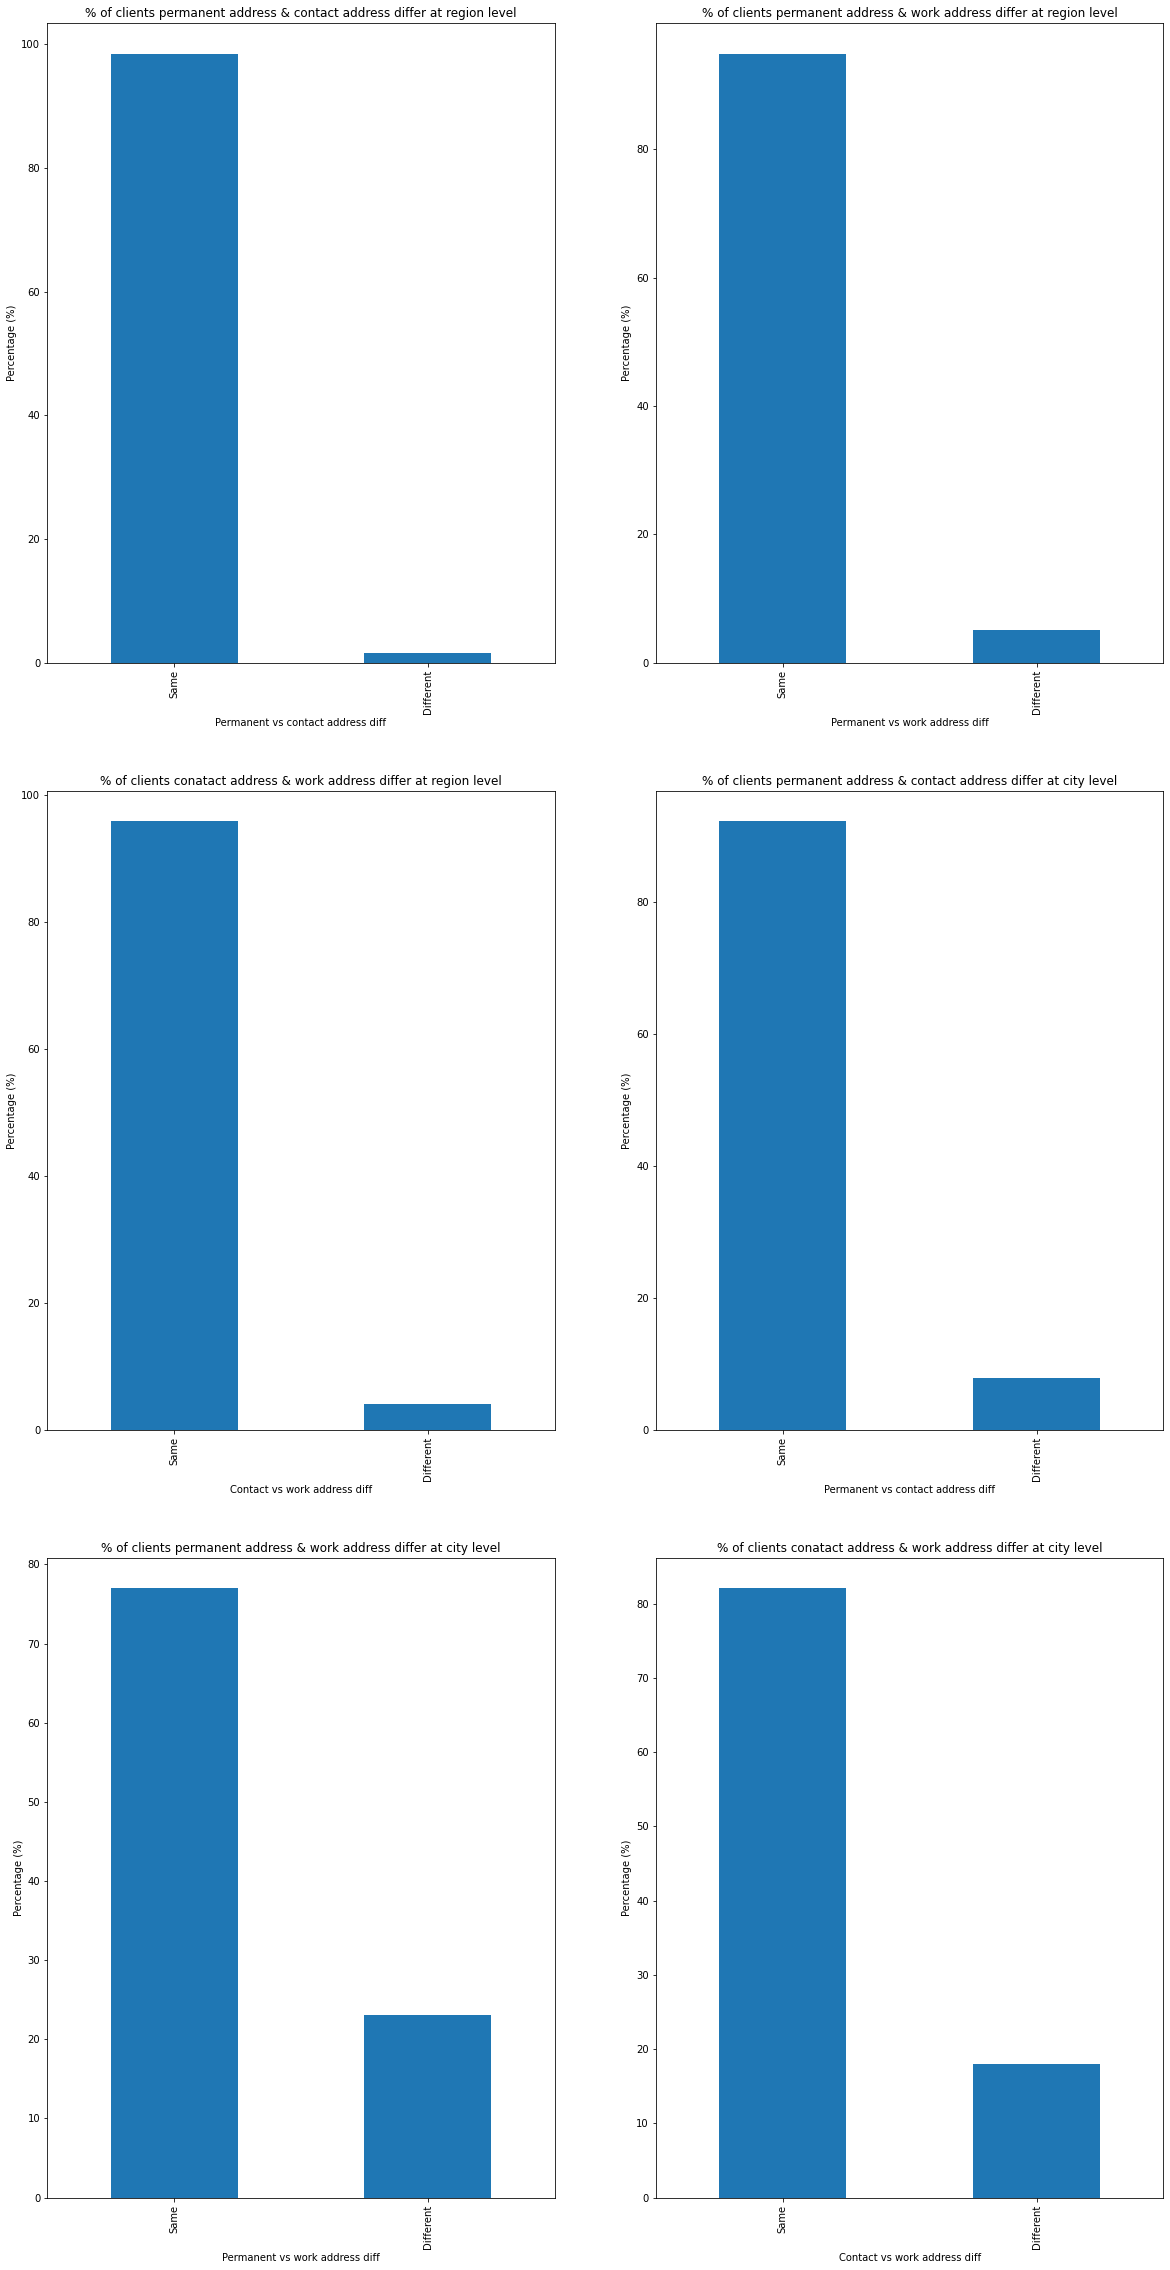

In [73]:
plt.figure(figsize=[20,40])
plt.subplot(3,2,1)
plt.title("% of clients permanent address & contact address differ at region level", fontsize=12)
plt.xlabel('Permanent vs contact address diff')
plt.ylabel('Percentage (%)')
(appli_data_filtered['REG_REGION_NOT_LIVE_REGION'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,2)
plt.title("% of clients permanent address & work address differ at region level", fontsize=12)
plt.xlabel('Permanent vs work address diff')
plt.ylabel('Percentage (%)')
(appli_data_filtered['REG_REGION_NOT_WORK_REGION'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,3)
plt.title("% of clients conatact address & work address differ at region level", fontsize=12)
plt.xlabel('Contact vs work address diff')
plt.ylabel('Percentage (%)')
(appli_data_filtered['LIVE_REGION_NOT_WORK_REGION'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,4)
plt.title("% of clients permanent address & contact address differ at city level", fontsize=12)
plt.xlabel('Permanent vs contact address diff')
plt.ylabel('Percentage (%)')
(appli_data_filtered['REG_CITY_NOT_LIVE_CITY'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,5)
plt.title("% of clients permanent address & work address differ at city level", fontsize=12)
plt.xlabel('Permanent vs work address diff')
plt.ylabel('Percentage (%)')
(appli_data_filtered['REG_CITY_NOT_WORK_CITY'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,6)
plt.title("% of clients conatact address & work address differ at city level", fontsize=12)
plt.xlabel('Contact vs work address diff')
plt.ylabel('Percentage (%)')
(appli_data_filtered['LIVE_CITY_NOT_WORK_CITY'].value_counts(normalize=True)*100).plot.bar()
plt.show()

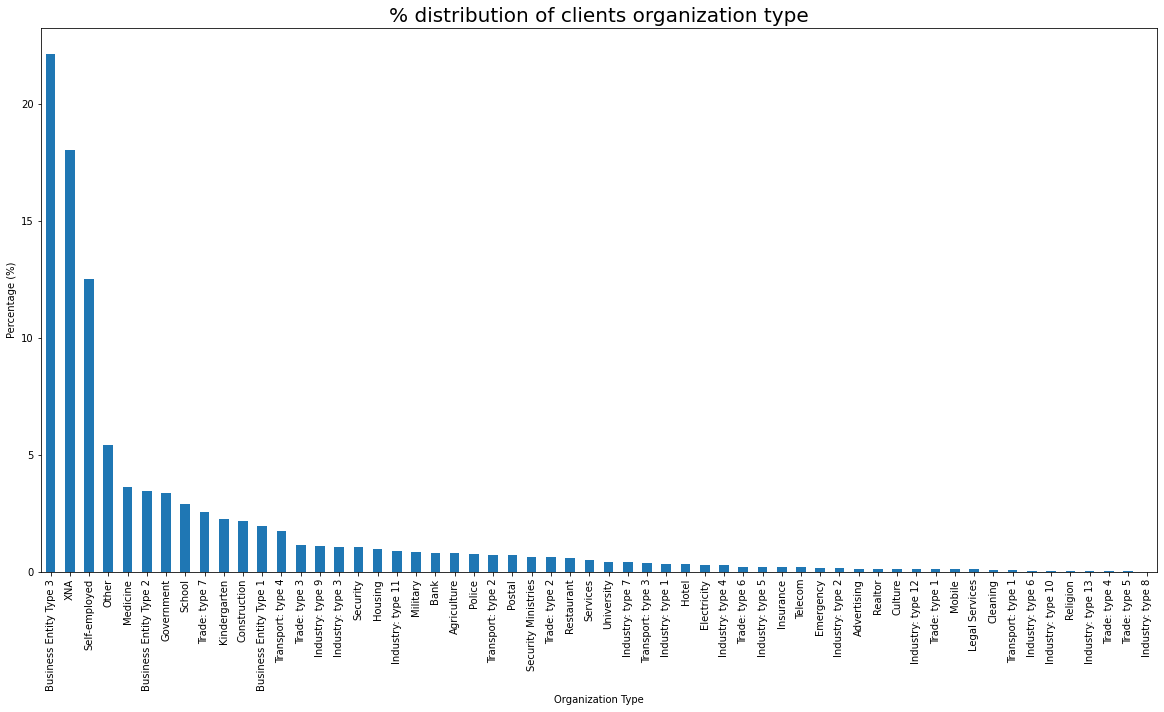

In [74]:
plt.figure(figsize=[20,10])
plt.title("% distribution of clients organization type", fontsize=20)
plt.xlabel('Organization Type')
plt.ylabel('Percentage (%)')
(appli_data_filtered['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

The column of **ORGANIZATION_TYPE** has around 18% values as **XNA** and it has no mention in the data dictionary. Let's find out what we can about XNA from job/income related columns and impute XNA.

In [75]:
appli_data_filtered[appli_data_filtered['ORGANIZATION_TYPE']=='XNA']['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [76]:
appli_data_filtered[appli_data_filtered['ORGANIZATION_TYPE']=='XNA']['OCCUPATION_TYPE'].value_counts()

Cleaning staff    2
Name: OCCUPATION_TYPE, dtype: int64

Based on the above analysis we can infer that **XNA** in **ORGANIZATION_TYPE** means **Not Applicable** and has been put against clients who are either **Pensioner** or **Unemployed**. Thus, for this column **XNA** will be replaced with **np.Nan** to take those values automatically out of further analysis.

In [77]:
appli_data_filtered['ORGANIZATION_TYPE'].replace('XNA',np.NaN,inplace=True)

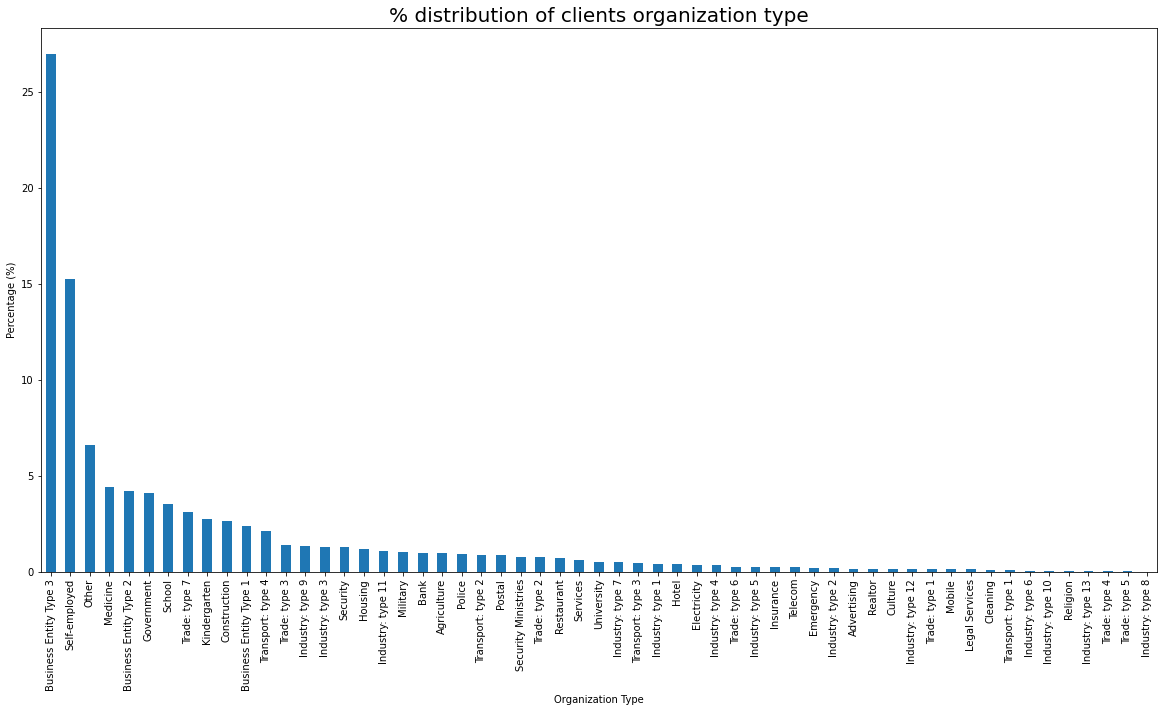

In [78]:
plt.figure(figsize=[20,10])
plt.title("% distribution of clients organization type", fontsize=20)
plt.xlabel('Organization Type')
plt.ylabel('Percentage (%)')
(appli_data_filtered['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

From the above figure we can observe that clients working in **Business Entity Type 3 organizations** have majority of the loan applications.

## Missing Value Imputations

In [79]:
analyze_missing.percentages(appli_data_filtered)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
ORGANIZATION_TYPE             18.007161
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
dtype: float64

We will now proceed to impute missing values of **OCCUPATION_TYPE** column and start with Pensioner and
Unemployed category, then proceed for other categories in this column while referencing entries in
the NAME_INCOME_TYPE column.

In [80]:
appli_data_filtered[appli_data_filtered['ORGANIZATION_TYPE'].isnull()].loc[:,['NAME_INCOME_TYPE','OCCUPATION_TYPE']].value_counts(dropna=False)

NAME_INCOME_TYPE  OCCUPATION_TYPE
Pensioner         NaN                55350
Unemployed        NaN                   22
Pensioner         Cleaning staff         2
dtype: int64

In [81]:
result = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Pensioner',['OCCUPATION_TYPE']].fillna('Is Pensioner')

In [82]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Pensioner',['OCCUPATION_TYPE']] = result.copy()

In [83]:
result_unemployed = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Unemployed',['OCCUPATION_TYPE']].fillna('Is Unemployed')

In [84]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Unemployed',['OCCUPATION_TYPE']] = result_unemployed.copy()

In [85]:
appli_data_filtered.loc[appli_data_filtered['OCCUPATION_TYPE'].isnull(),['NAME_INCOME_TYPE']].value_counts(normalize=True)*100

NAME_INCOME_TYPE    
Working                 60.762704
Commercial associate    29.983907
State servant            9.233883
Student                  0.012192
Businessman              0.004877
Maternity leave          0.002438
dtype: float64

Percentage **missing value in OCCUPATION_TYPE** for NAME_INCOME_TYPE == **Working**

In [86]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Working',['OCCUPATION_TYPE']].value_counts(normalize=True, dropna=False)*100

OCCUPATION_TYPE      
Laborers                 25.538186
NaN                      15.695265
Sales staff              13.107310
Core staff                8.867951
Drivers                   8.106491
Managers                  6.490987
High skill tech staff     4.315568
Accountants               3.219671
Medicine staff            3.095595
Security staff            3.011828
Cooking staff             2.637711
Cleaning staff            2.203131
Low-skill Laborers        1.068185
Private service staff     1.023467
Waiters/barmen staff      0.571882
Secretaries               0.439619
Realty agents             0.263267
HR staff                  0.175721
IT staff                  0.168164
dtype: float64

Percentage **missing value in OCCUPATION_TYPE** for NAME_INCOME_TYPE == **Commercial associate**

In [87]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Commercial associate',['OCCUPATION_TYPE']].value_counts(normalize=True, dropna=False)*100

OCCUPATION_TYPE      
Laborers                 17.821188
NaN                      17.170504
Sales staff              15.504699
Managers                 12.449558
Core staff                9.115154
Drivers                   6.864292
Accountants               5.543377
High skill tech staff     4.880126
Security staff            2.176857
Cooking staff             1.822193
Medicine staff            1.446584
Private service staff     1.380957
Cleaning staff            1.245514
Waiters/barmen staff      0.538978
Low-skill Laborers        0.516637
Secretaries               0.478937
Realty agents             0.452407
HR staff                  0.307190
IT staff                  0.284849
dtype: float64

Percentage **missing value in OCCUPATION_TYPE** for NAME_INCOME_TYPE == **State servant**

In [88]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'State servant',['OCCUPATION_TYPE']].value_counts(normalize=True, dropna=False)*100

OCCUPATION_TYPE      
Core staff               32.050869
NaN                      17.449201
Medicine staff           11.910796
Managers                  9.869603
Laborers                  8.607105
High skill tech staff     4.759711
Drivers                   3.755241
Accountants               3.358983
Cooking staff             2.087269
Security staff            1.750910
Secretaries               1.216422
Cleaning staff            1.202599
Sales staff               0.857024
HR staff                  0.294890
IT staff                  0.253421
Waiters/barmen staff      0.244206
Private service staff     0.175091
Low-skill Laborers        0.115191
Realty agents             0.041469
dtype: float64

Percentage **missing value in OCCUPATION_TYPE** for NAME_INCOME_TYPE == **Student**

In [89]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Student',['OCCUPATION_TYPE']].value_counts(normalize=True, dropna=False)*100

OCCUPATION_TYPE     
Laborers                27.777778
NaN                     27.777778
Core staff              16.666667
Low-skill Laborers      11.111111
Accountants              5.555556
Drivers                  5.555556
Waiters/barmen staff     5.555556
dtype: float64

Percentage **missing value in OCCUPATION_TYPE** for NAME_INCOME_TYPE == **Businessman**

In [90]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Businessman',['OCCUPATION_TYPE']].value_counts(normalize=True, dropna=False)*100

OCCUPATION_TYPE
Managers           70.0
NaN                20.0
Core staff         10.0
dtype: float64

Percentage **missing value in OCCUPATION_TYPE** for NAME_INCOME_TYPE == **Maternity leave**

In [91]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Maternity leave',['OCCUPATION_TYPE']].value_counts(normalize=True, dropna=False)*100

OCCUPATION_TYPE
Core staff         40.0
Accountants        20.0
Laborers           20.0
NaN                20.0
dtype: float64

**Imputing missing values in OCCUPATION_TYPE against all the above NAME_INCOME_TYPE categories.**

In [92]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Working',['OCCUPATION_TYPE']] = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Working',['OCCUPATION_TYPE']].fillna('Laborers')

In [93]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Commercial associate',['OCCUPATION_TYPE']] = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Commercial associate',['OCCUPATION_TYPE']].fillna('Laborers')

In [94]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'State servant',['OCCUPATION_TYPE']] = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'State servant',['OCCUPATION_TYPE']].fillna('Core staff')

In [95]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Student',['OCCUPATION_TYPE']] = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Student',['OCCUPATION_TYPE']].fillna('Laborers')

In [96]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Businessman',['OCCUPATION_TYPE']] = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Businessman',['OCCUPATION_TYPE']].fillna('Managers')

In [97]:
appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Maternity leave',['OCCUPATION_TYPE']] = appli_data_filtered.loc[appli_data_filtered['NAME_INCOME_TYPE'] == 'Maternity leave',['OCCUPATION_TYPE']].fillna('Core staff')

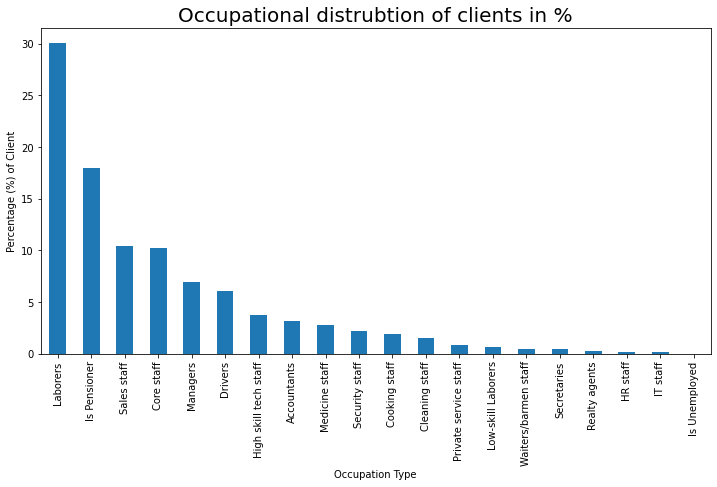

In [98]:
plt.figure(figsize=[12,6])
plt.title("Occupational distrubtion of clients in %", fontsize=20)
plt.xlabel('Occupation Type')
plt.ylabel('Percentage (%) of Client')
(appli_data_filtered['OCCUPATION_TYPE'].value_counts(normalize=True,dropna=False)*100).plot.bar()
plt.show()

The above figure shows that Labourers, Pensioners, Sales Staff and Core Staff constitute the majority of loan clients.

**Checking what other missing values are remaining**

In [99]:
analyze_missing.percentages(appli_data_filtered)

EXT_SOURCE_3                  19.825307
ORGANIZATION_TYPE             18.007161
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
dtype: float64

As per data dictionary the below mentioned columns are categorical. So imputing their missing values with individual Mode.

In [100]:
cols = ['AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'NAME_TYPE_SUITE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'CNT_FAM_MEMBERS']

In [101]:
for i in cols:
    mod_value = appli_data_filtered[i].mode()[0]
    appli_data_filtered[i].fillna(mod_value, inplace=True)

In [102]:
analyze_missing.percentages(appli_data_filtered)

EXT_SOURCE_3         19.825307
ORGANIZATION_TYPE    18.007161
dtype: float64

The columns **EXT_SOURCE_3** are normalised score from external data. Since we have no idea of the external data, we are leaving them as is.

All missing values stands imputed now for application_data.csv dataset except for ORGANIZATION_TYPE which we have introduced for ease of further analysis.

### Checking for Data Imbalance

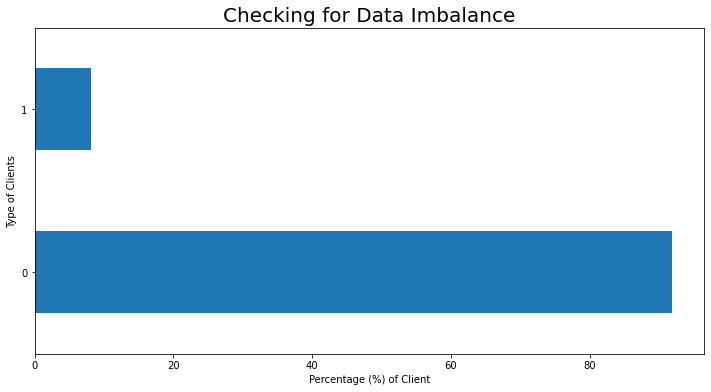

In [103]:
plt.figure(figsize=[12,6])
plt.title("Checking for Data Imbalance", fontsize=20)
plt.xlabel('Percentage (%) of Client')
plt.ylabel('Type of Clients')
(appli_data_filtered['TARGET'].value_counts(normalize=True)*100).plot.barh()
plt.show()

- **Majority (92%)** of the data is of client **type 0 - all other cases** i.e who had no problem in repaying the loan, only **8%** is of client **type 1 - client with payment difficulties**: he/she had late payment more than X days on at least one of the first Y
- This shows that there is an imbalance in the data.

In [104]:
df_target0 = (appli_data_filtered.loc[appli_data_filtered.TARGET == 0]).copy().reset_index()
df_target1 = appli_data_filtered.loc[appli_data_filtered.TARGET == 1].copy().reset_index()

In [105]:
df_target0.drop('index', axis =1, inplace=True)

In [106]:
df_target1.drop('index', axis =1, inplace=True)

In [107]:
df_target0.shape

(282686, 76)

In [108]:
df_target1.shape

(24825, 76)

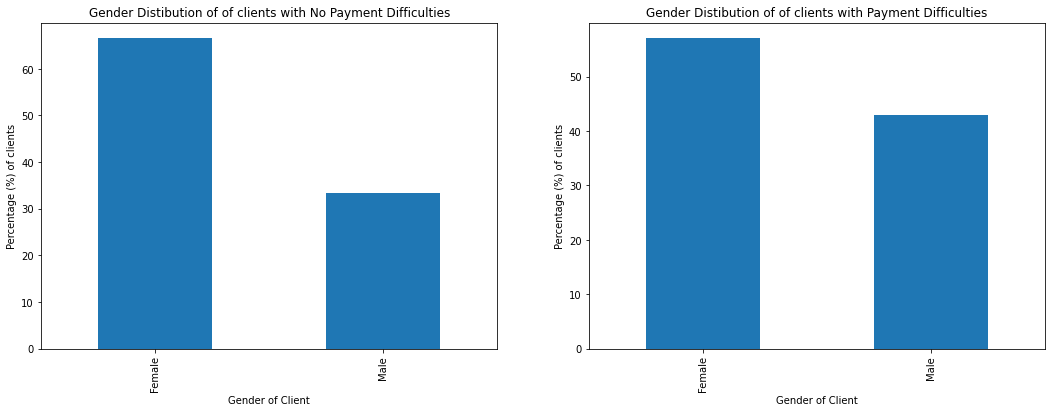

In [109]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
plt.title("Gender Distibution of of clients with No Payment Difficulties", fontsize=12)
plt.xlabel('Gender of Client')
plt.ylabel('Percentage (%) of clients')
(df_target0['CODE_GENDER'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(1,2,2)
plt.title("Gender Distibution of of clients with Payment Difficulties", fontsize=12)
plt.xlabel('Gender of Client')
plt.ylabel('Percentage (%) of clients')
(df_target1['CODE_GENDER'].value_counts(normalize=True)*100).plot.bar()
plt.show()

Comaparing the No Payment Difficulties and Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage of Male in the Payment Difficulties from No Payment Difficulties category.

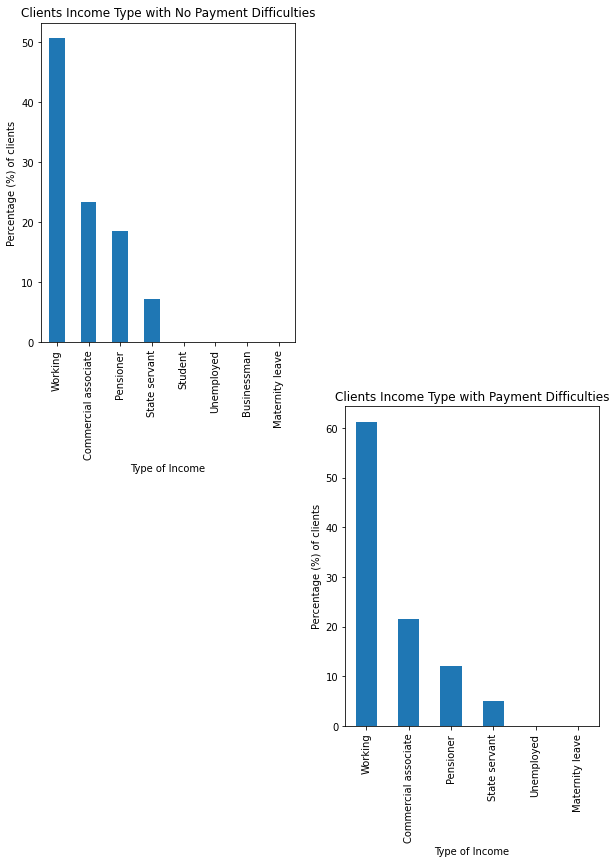

In [110]:
plt.figure(figsize=[10,20])
plt.subplot(3,2,1)
plt.title("Clients Income Type with No Payment Difficulties", fontsize=12)
plt.xlabel('Type of Income')
plt.ylabel('Percentage (%) of clients')
(df_target0['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.subplot(3,2,4)
plt.title("Clients Income Type with Payment Difficulties", fontsize=12)
plt.xlabel('Type of Income')
plt.ylabel('Percentage (%) of clients')
(df_target1['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

We observe a decrease in the percentage of Pensioners, State Servants in the with Payment Difficulties categories and Students are zero.

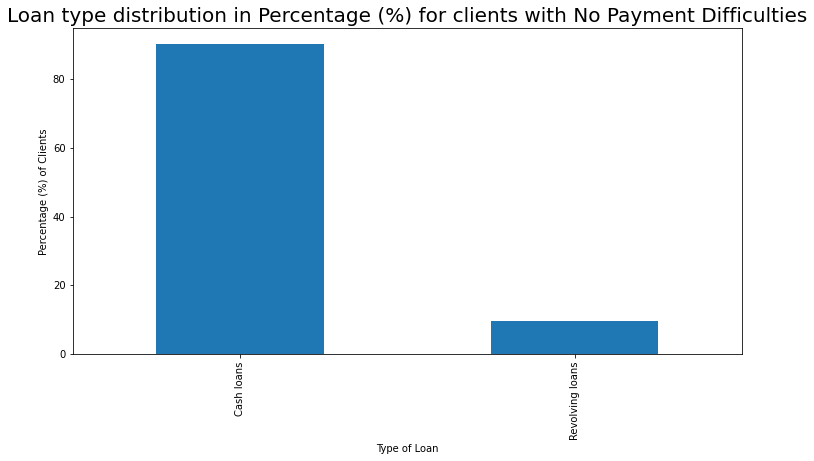

In [111]:
plt.figure(figsize=[12,6])
plt.title("Loan type distribution in Percentage (%) for clients with No Payment Difficulties", fontsize=20)
plt.xlabel('Type of Loan')
plt.ylabel('Percentage (%) of Clients')
(df_target0['NAME_CONTRACT_TYPE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

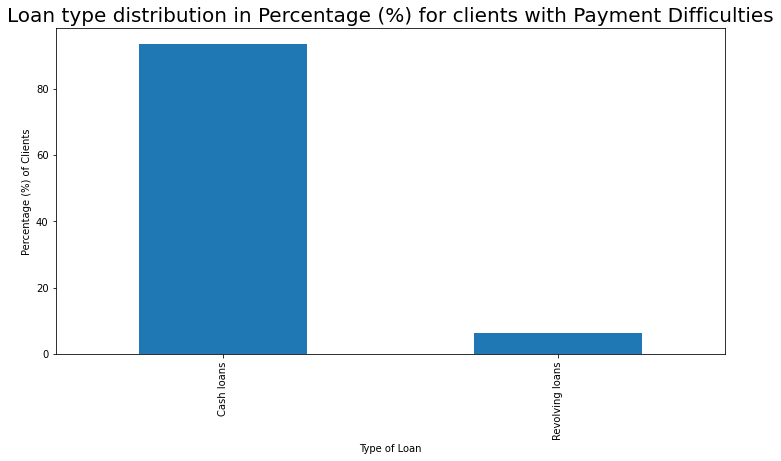

In [112]:
plt.figure(figsize=[12,6])
plt.title("Loan type distribution in Percentage (%) for clients with Payment Difficulties", fontsize=20)
plt.xlabel('Type of Loan')
plt.ylabel('Percentage (%) of Clients')
(df_target1['NAME_CONTRACT_TYPE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- There is a slight increase in the percentage of clients with Payment Difficulties for Cash loans in comparision to the other category
- There is a slight decrease in the percentage of clients with Payment Difficulties for Revolving loans in comparision to the other category

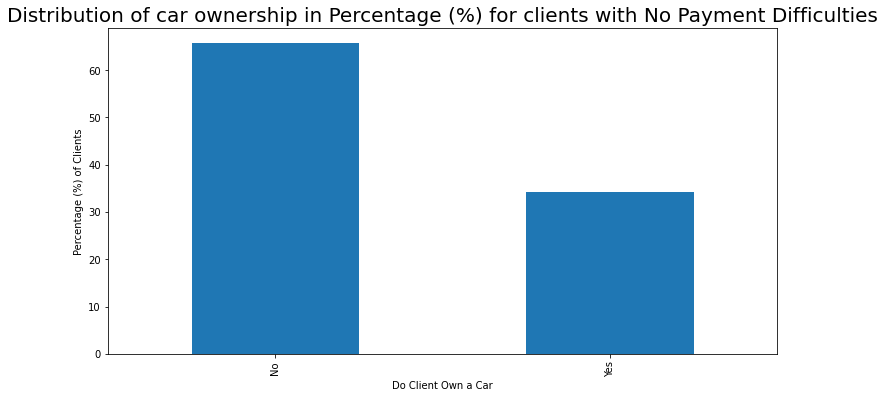

In [113]:
plt.figure(figsize=[12,6])
plt.title("Distribution of car ownership in Percentage (%) for clients with No Payment Difficulties", fontsize=20)
plt.xlabel('Do Client Own a Car')
plt.ylabel('Percentage (%) of Clients')
(df_target0['FLAG_OWN_CAR'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

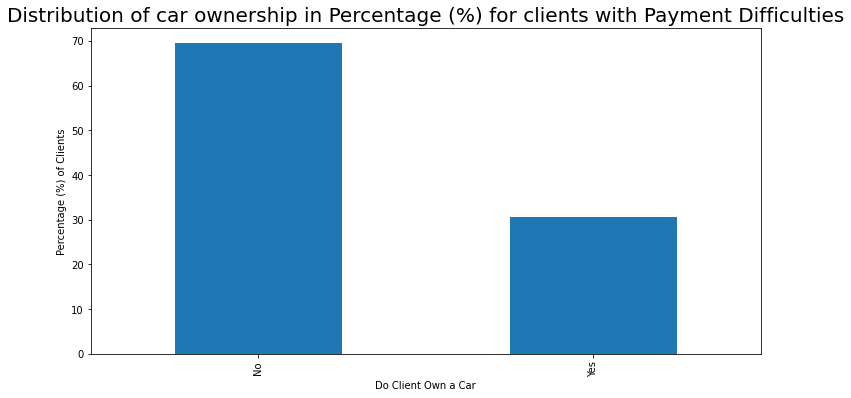

In [114]:
plt.figure(figsize=[12,6])
plt.title("Distribution of car ownership in Percentage (%) for clients with Payment Difficulties", fontsize=20)
plt.xlabel('Do Client Own a Car')
plt.ylabel('Percentage (%) of Clients')
(df_target1['FLAG_OWN_CAR'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- Clients with payment difficulties has a slightly higher percentages of those who dont own a car, and a slightly less percentages of those who own a car. 

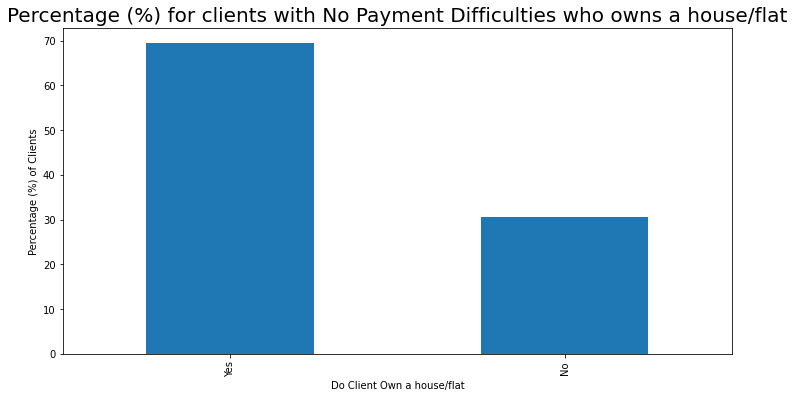

In [115]:
plt.figure(figsize=[12,6])
plt.title("Percentage (%) for clients with No Payment Difficulties who owns a house/flat", fontsize=20)
plt.xlabel('Do Client Own a house/flat')
plt.ylabel('Percentage (%) of Clients')
(df_target0['FLAG_OWN_REALTY'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

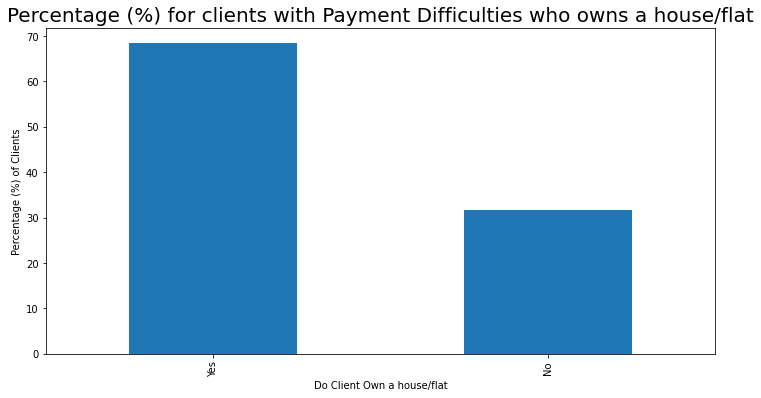

In [116]:
plt.figure(figsize=[12,6])
plt.title("Percentage (%) for clients with Payment Difficulties who owns a house/flat", fontsize=20)
plt.xlabel('Do Client Own a house/flat')
plt.ylabel('Percentage (%) of Clients')
(df_target1['FLAG_OWN_REALTY'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- No discernable differences observed

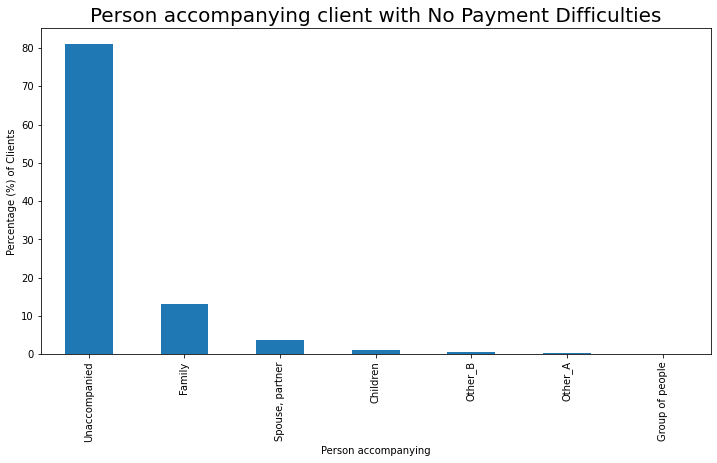

In [117]:
plt.figure(figsize=[12,6])
plt.title("Person accompanying client with No Payment Difficulties", fontsize=20)
plt.xlabel('Person accompanying')
plt.ylabel('Percentage (%) of Clients')
(df_target0['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

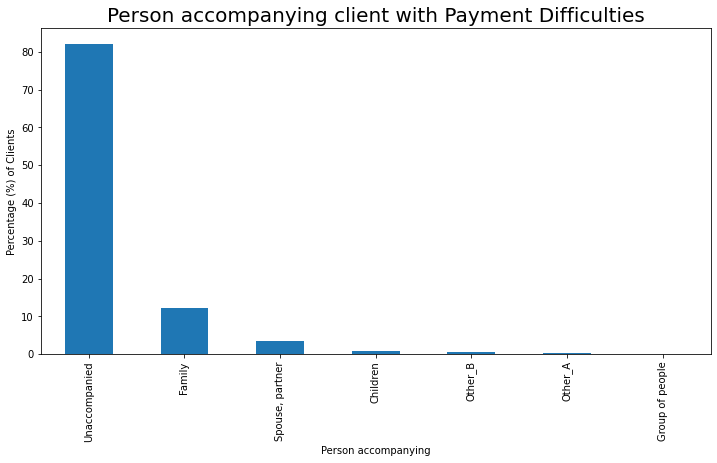

In [118]:
plt.figure(figsize=[12,6])
plt.title("Person accompanying client with Payment Difficulties", fontsize=20)
plt.xlabel('Person accompanying')
plt.ylabel('Percentage (%) of Clients')
(df_target1['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- No discernable differences observed

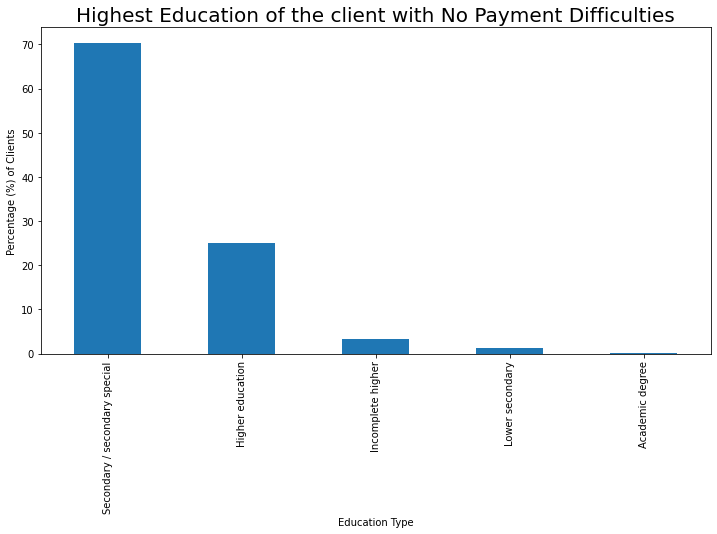

In [119]:
plt.figure(figsize=[12,6])
plt.title("Highest Education of the client with No Payment Difficulties", fontsize=20)
plt.xlabel('Education Type')
plt.ylabel('Percentage (%) of Clients')
(df_target0['NAME_EDUCATION_TYPE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

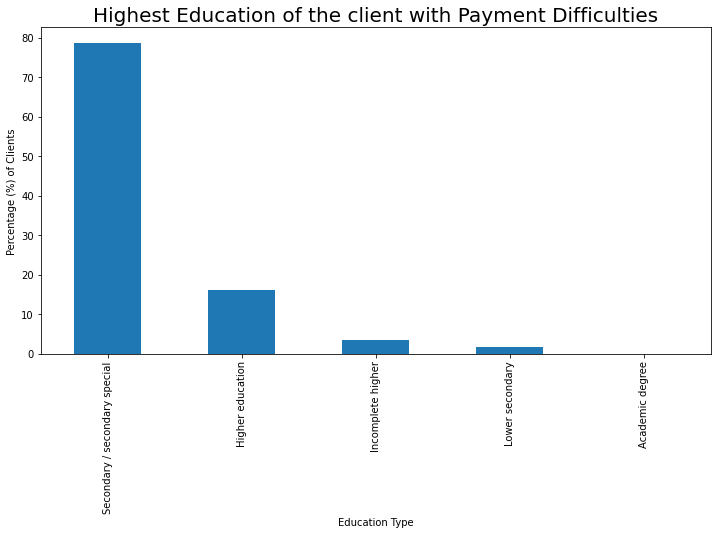

In [120]:
plt.figure(figsize=[12,6])
plt.title("Highest Education of the client with Payment Difficulties", fontsize=20)
plt.xlabel('Education Type')
plt.ylabel('Percentage (%) of Clients')
(df_target1['NAME_EDUCATION_TYPE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- Clients with Payment Difficulties has Less percentages of Higher Education and More Percentages of Secondary / secondary special education than clients who don't have any payment difficulties.

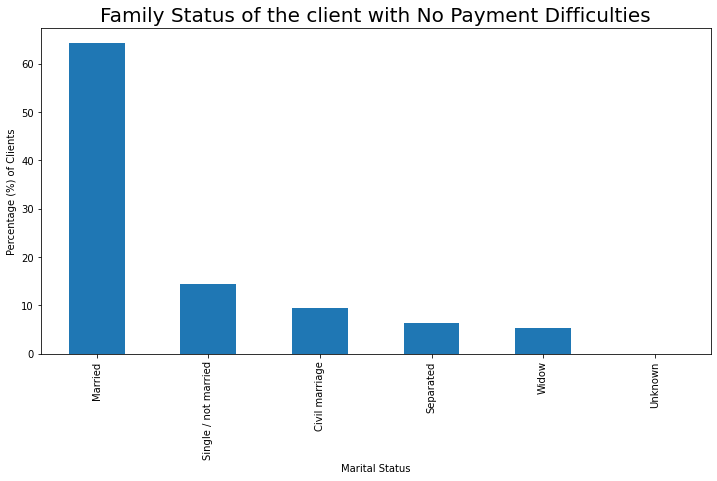

In [121]:
plt.figure(figsize=[12,6])
plt.title("Family Status of the client with No Payment Difficulties", fontsize=20)
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%) of Clients')
(df_target0['NAME_FAMILY_STATUS'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

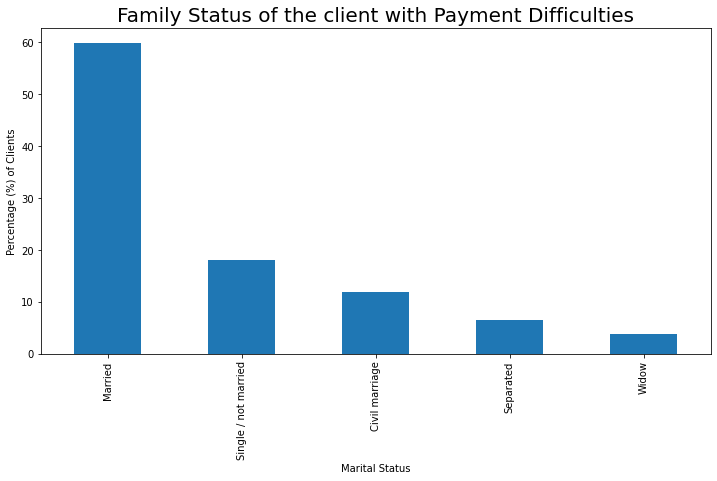

In [122]:
plt.figure(figsize=[12,6])
plt.title("Family Status of the client with Payment Difficulties", fontsize=20)
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%) of Clients')
(df_target1['NAME_FAMILY_STATUS'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- Clients with Payment Difficulties have:
    - Lower Percentages of Married
    - Higher Percentages of Single
    - Higher Percentages of Civil Marriage

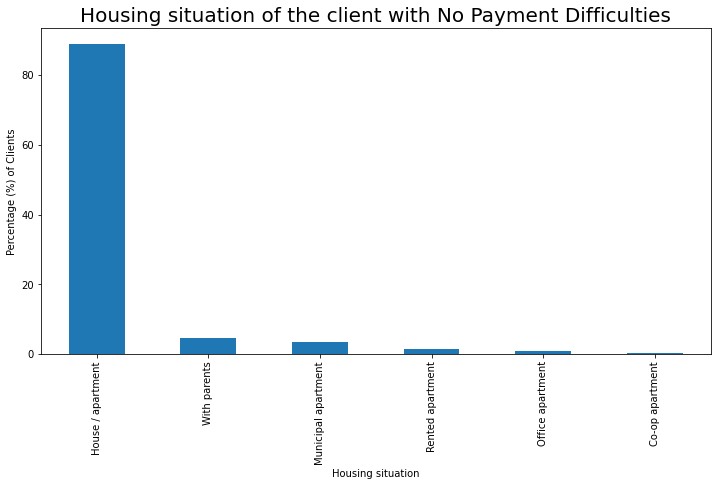

In [123]:
plt.figure(figsize=[12,6])
plt.title("Housing situation of the client with No Payment Difficulties", fontsize=20)
plt.xlabel('Housing situation')
plt.ylabel('Percentage (%) of Clients')
(df_target0['NAME_HOUSING_TYPE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

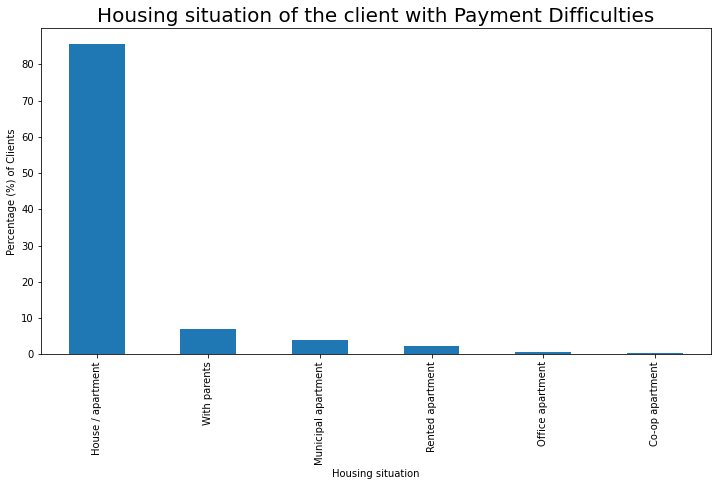

In [124]:
plt.figure(figsize=[12,6])
plt.title("Housing situation of the client with Payment Difficulties", fontsize=20)
plt.xlabel('Housing situation')
plt.ylabel('Percentage (%) of Clients')
(df_target1['NAME_HOUSING_TYPE'].value_counts(normalize=True, dropna=False)*100).plot.bar()
plt.show()

- Clients with Payment Difficulties have:
    - Lower Percentages of Owned House / apartment
    - Higher Percentages of Living With parents

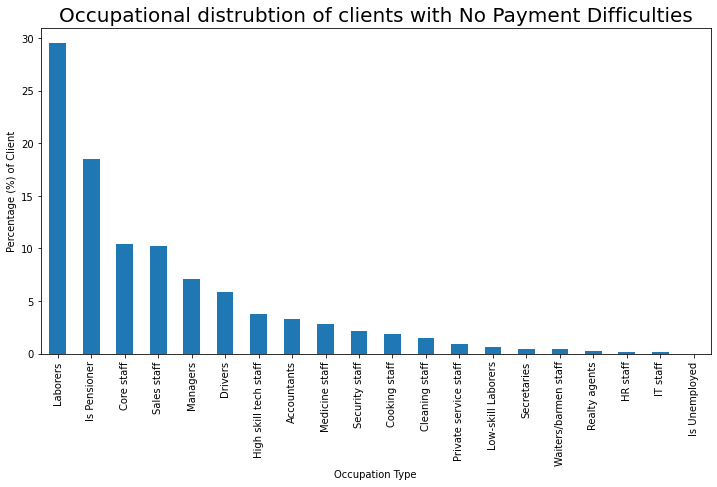

In [125]:
plt.figure(figsize=[12,6])
plt.title("Occupational distrubtion of clients with No Payment Difficulties", fontsize=20)
plt.xlabel('Occupation Type')
plt.ylabel('Percentage (%) of Client')
(df_target0['OCCUPATION_TYPE'].value_counts(normalize=True,dropna=False)*100).plot.bar()
plt.show()

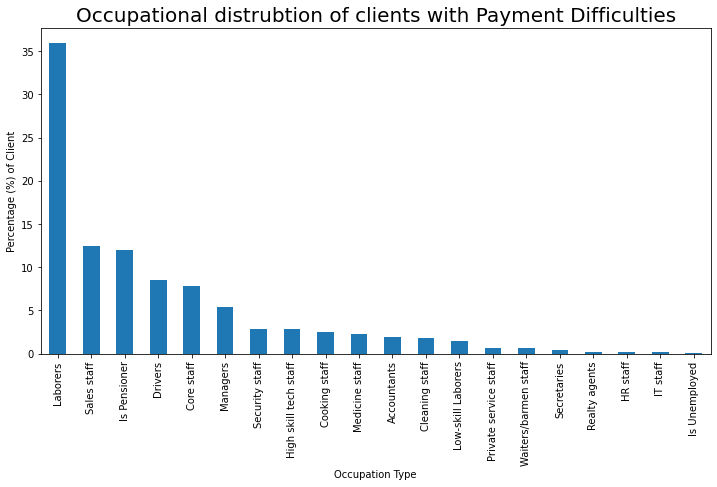

In [126]:
plt.figure(figsize=[12,6])
plt.title("Occupational distrubtion of clients with Payment Difficulties", fontsize=20)
plt.xlabel('Occupation Type')
plt.ylabel('Percentage (%) of Client')
(df_target1['OCCUPATION_TYPE'].value_counts(normalize=True,dropna=False)*100).plot.bar()
plt.show()

- Clients with Payment Difficulties have:
    - Higher Percentages Labourers as Occupation

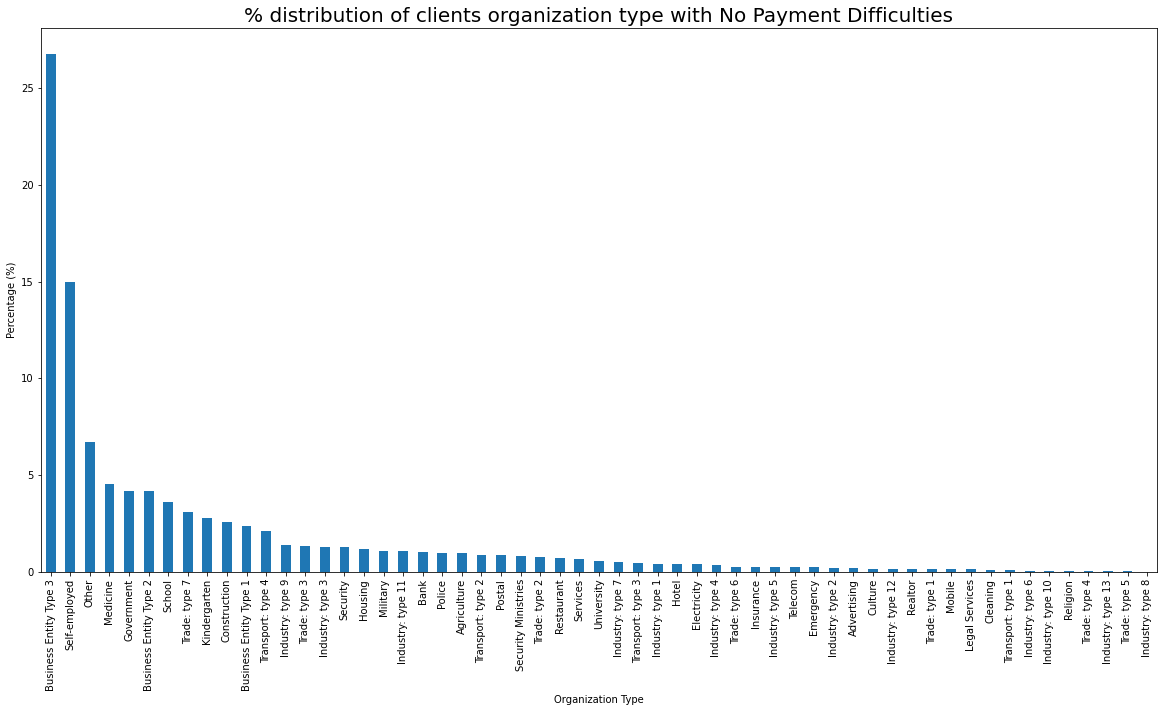

In [127]:
plt.figure(figsize=[20,10])
plt.title("% distribution of clients organization type with No Payment Difficulties", fontsize=20)
plt.xlabel('Organization Type')
plt.ylabel('Percentage (%)')
(df_target0['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [128]:
df_target0['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

Business Entity Type 3    26.777449
Self-employed             14.982067
Other                      6.690346
Medicine                   4.540126
Government                 4.202308
Business Entity Type 2     4.191453
School                     3.633056
Trade: type 7              3.079001
Kindergarten               2.777223
Construction               2.577485
Business Entity Type 1     2.386866
Transport: type 4          2.126338
Industry: type 9           1.364730
Trade: type 3              1.359519
Industry: type 3           1.272243
Security                   1.269203
Housing                    1.182361
Military                   1.085097
Industry: type 11          1.072505
Bank                       1.032123
Police                     0.965689
Agriculture                0.953965
Transport: type 2          0.882320
Postal                     0.857570
Security Ministries        0.815451
Trade: type 2              0.767253
Restaurant                 0.694306
Services                   0

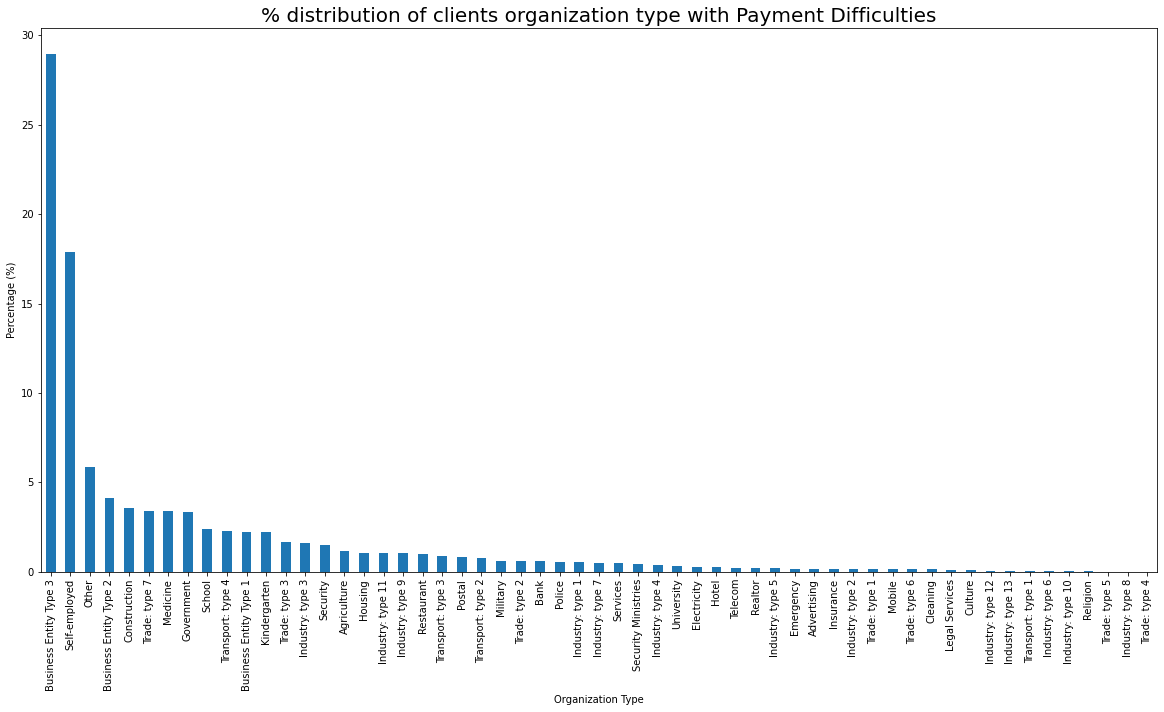

In [129]:
plt.figure(figsize=[20,10])
plt.title("% distribution of clients organization type with Payment Difficulties", fontsize=20)
plt.xlabel('Organization Type')
plt.ylabel('Percentage (%)')
(df_target1['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

In [130]:
df_target1['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

Business Entity Type 3    28.958095
Self-employed             17.897870
Other                      5.839249
Business Entity Type 2     4.121823
Construction               3.595145
Trade: type 7              3.389054
Medicine                   3.375315
Government                 3.324937
School                     2.408976
Transport: type 4          2.294481
Business Entity Type 1     2.230364
Kindergarten               2.216625
Trade: type 3              1.653309
Industry: type 3           1.593771
Security                   1.483856
Agriculture                1.177009
Housing                    1.076254
Industry: type 11          1.071674
Industry: type 9           1.030456
Restaurant                 0.970918
Transport: type 3          0.856423
Postal                     0.833524
Transport: type 2          0.787726
Military                   0.618273
Trade: type 2              0.609114
Bank                       0.595374
Police                     0.535837
Industry: type 1           0

- Clients with Payment Difficulties have:
    - Slightly Higher Percentages belonging Business Entity Type 3 organizations
    - Slightly Higher Percentages are self employed

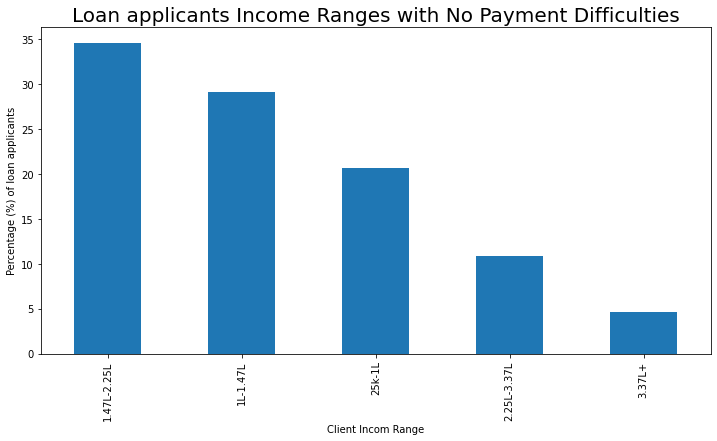

In [131]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants Income Ranges with No Payment Difficulties", fontsize=20)
plt.xlabel('Client Incom Range')
plt.ylabel('Percentage (%) of loan applicants')
(df_target0['CLIENT_INCOME_RANGE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

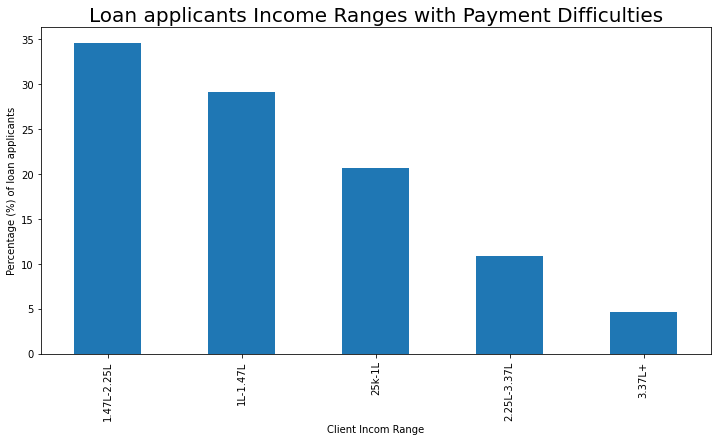

In [132]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants Income Ranges with Payment Difficulties", fontsize=20)
plt.xlabel('Client Incom Range')
plt.ylabel('Percentage (%) of loan applicants')
(df_target0['CLIENT_INCOME_RANGE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- Clients with Payment Higher % of Payment Difficulties have:
    - Income between 25k to 2.25L

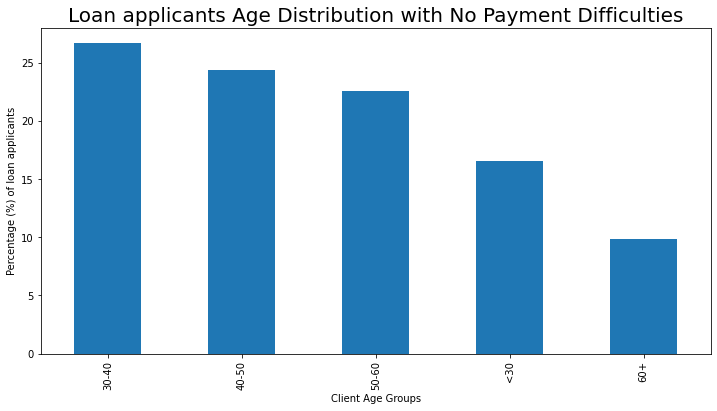

In [133]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants Age Distribution with No Payment Difficulties", fontsize=20)
plt.xlabel('Client Age Groups')
plt.ylabel('Percentage (%) of loan applicants')
(df_target0['CLIENT_AGE_GROUP'].value_counts(normalize=True)*100).plot.bar()
plt.show()

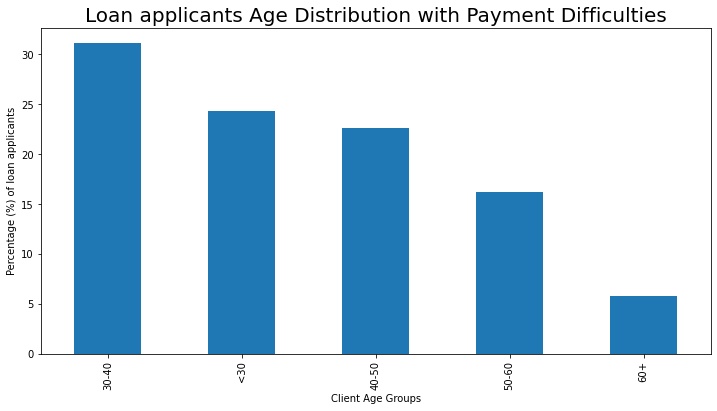

In [134]:
plt.figure(figsize=[12,6])
plt.title("Loan applicants Age Distribution with Payment Difficulties", fontsize=20)
plt.xlabel('Client Age Groups')
plt.ylabel('Percentage (%) of loan applicants')
(df_target1['CLIENT_AGE_GROUP'].value_counts(normalize=True)*100).plot.bar()
plt.show()

- Clients with Payment Difficulties:
    - Belong Mostly to age group of 30 to 40, 5% increase

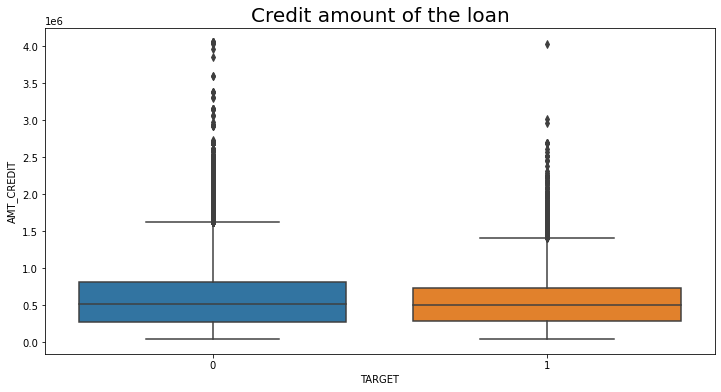

In [135]:
plt.figure(figsize=[12,6])
plt.title("Credit amount of the loan", fontsize=20)
sns.boxplot(data=appli_data_filtered, x='TARGET', y='AMT_CREDIT')
plt.show()

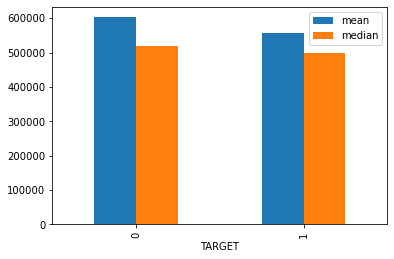

In [136]:
appli_data_filtered.groupby(by = 'TARGET')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar()
plt.show()

- Clients with Payment Difficulties:
    - Mostly have a lower Mean and Median values of Loan amount  credited than those with No Payment Difficulties

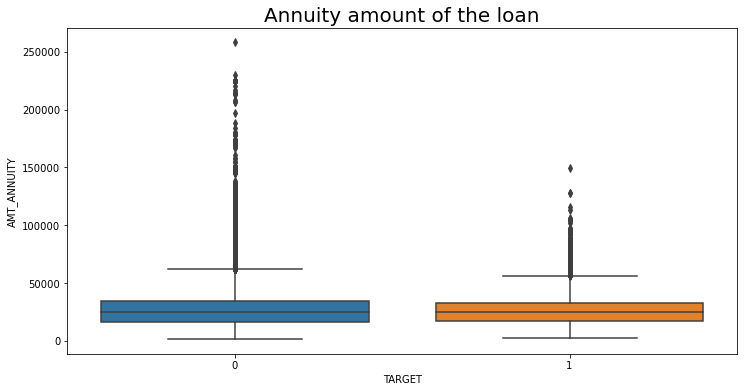

In [137]:
plt.figure(figsize=[12,6])
plt.title("Annuity amount of the loan", fontsize=20)
sns.boxplot(data=appli_data_filtered, x='TARGET', y='AMT_ANNUITY')
plt.show()

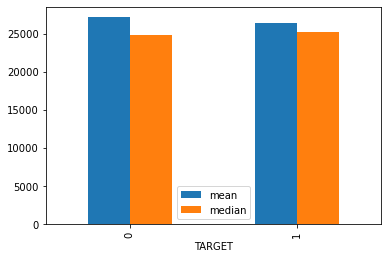

In [138]:
appli_data_filtered.groupby(by = 'TARGET')['AMT_ANNUITY'].aggregate(['mean','median']).plot.bar()
plt.show()

- Clients with Payment Difficulties:
    - Mostly have a higher Mean and Median values of Loan Annuity.

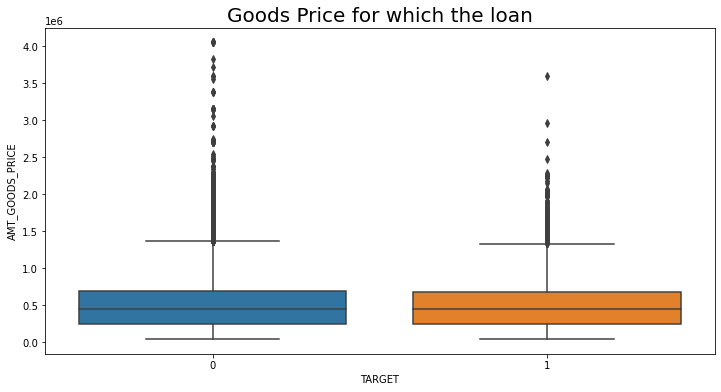

In [139]:
plt.figure(figsize=[12,6])
plt.title("Goods Price for which the loan", fontsize=20)
sns.boxplot(data=appli_data_filtered, x='TARGET', y='AMT_GOODS_PRICE')
plt.show()

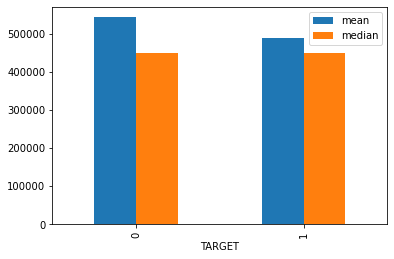

In [140]:
appli_data_filtered.groupby(by = 'TARGET')['AMT_GOODS_PRICE'].aggregate(['mean','median']).plot.bar()
plt.show()

- Clients with Payment Difficulties:
    - Average Goods Price are less for which loan is taken.

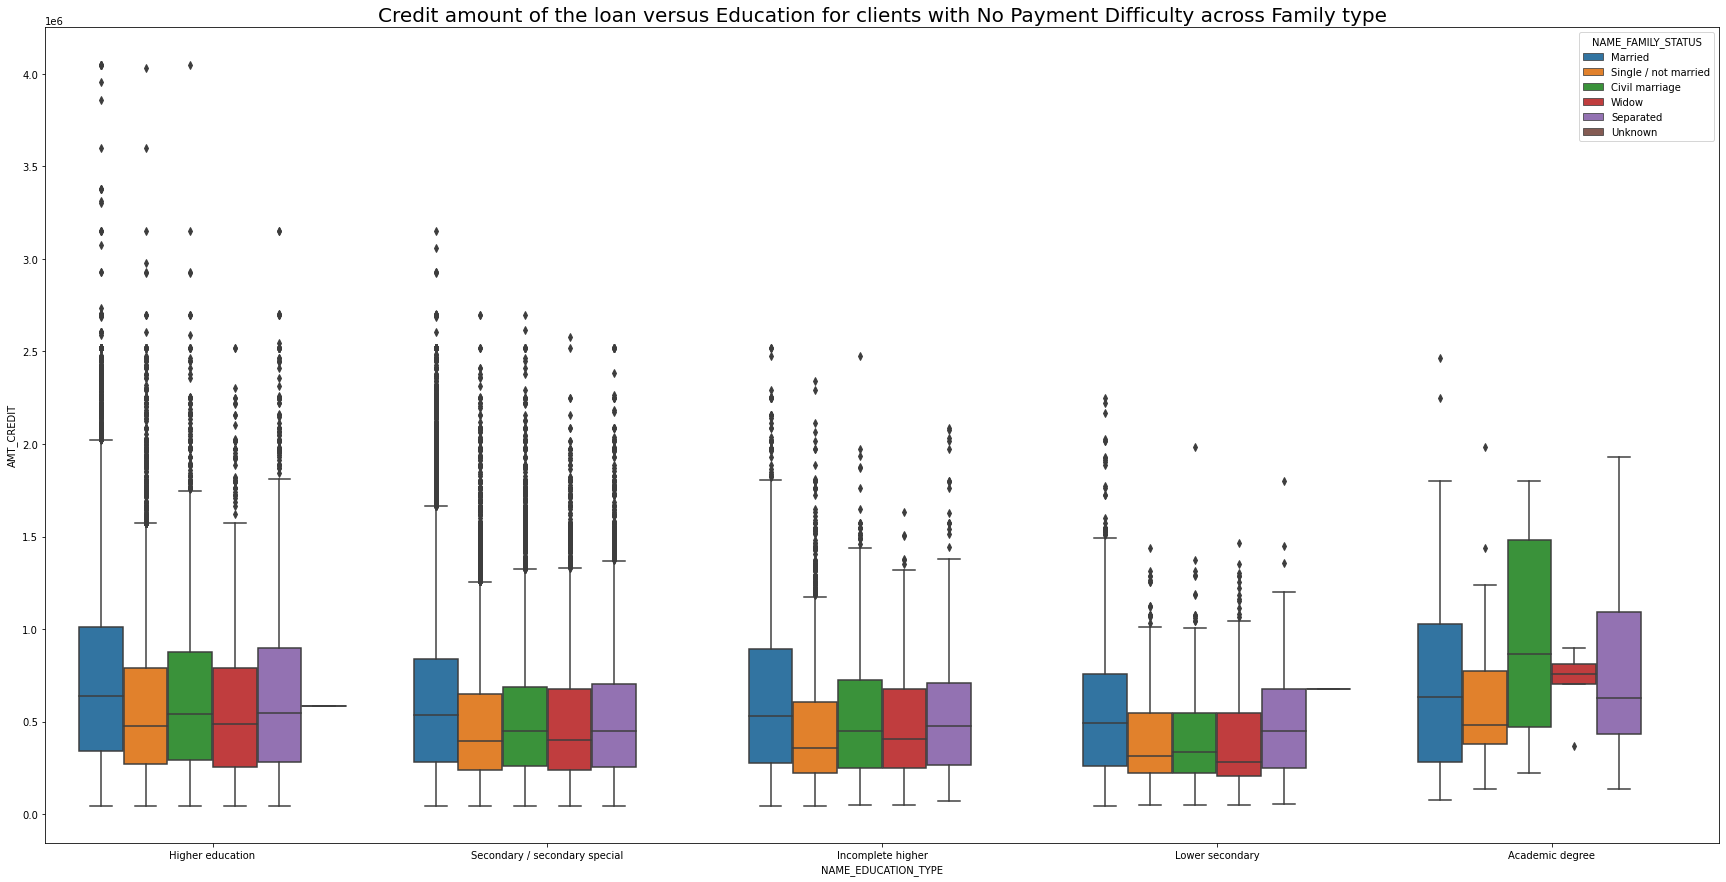

In [141]:
plt.figure(figsize=[30,15])
plt.title("Credit amount of the loan versus Education for clients with No Payment Difficulty across Family type", fontsize=20)
sns.boxplot(data=df_target0, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')
plt.show()

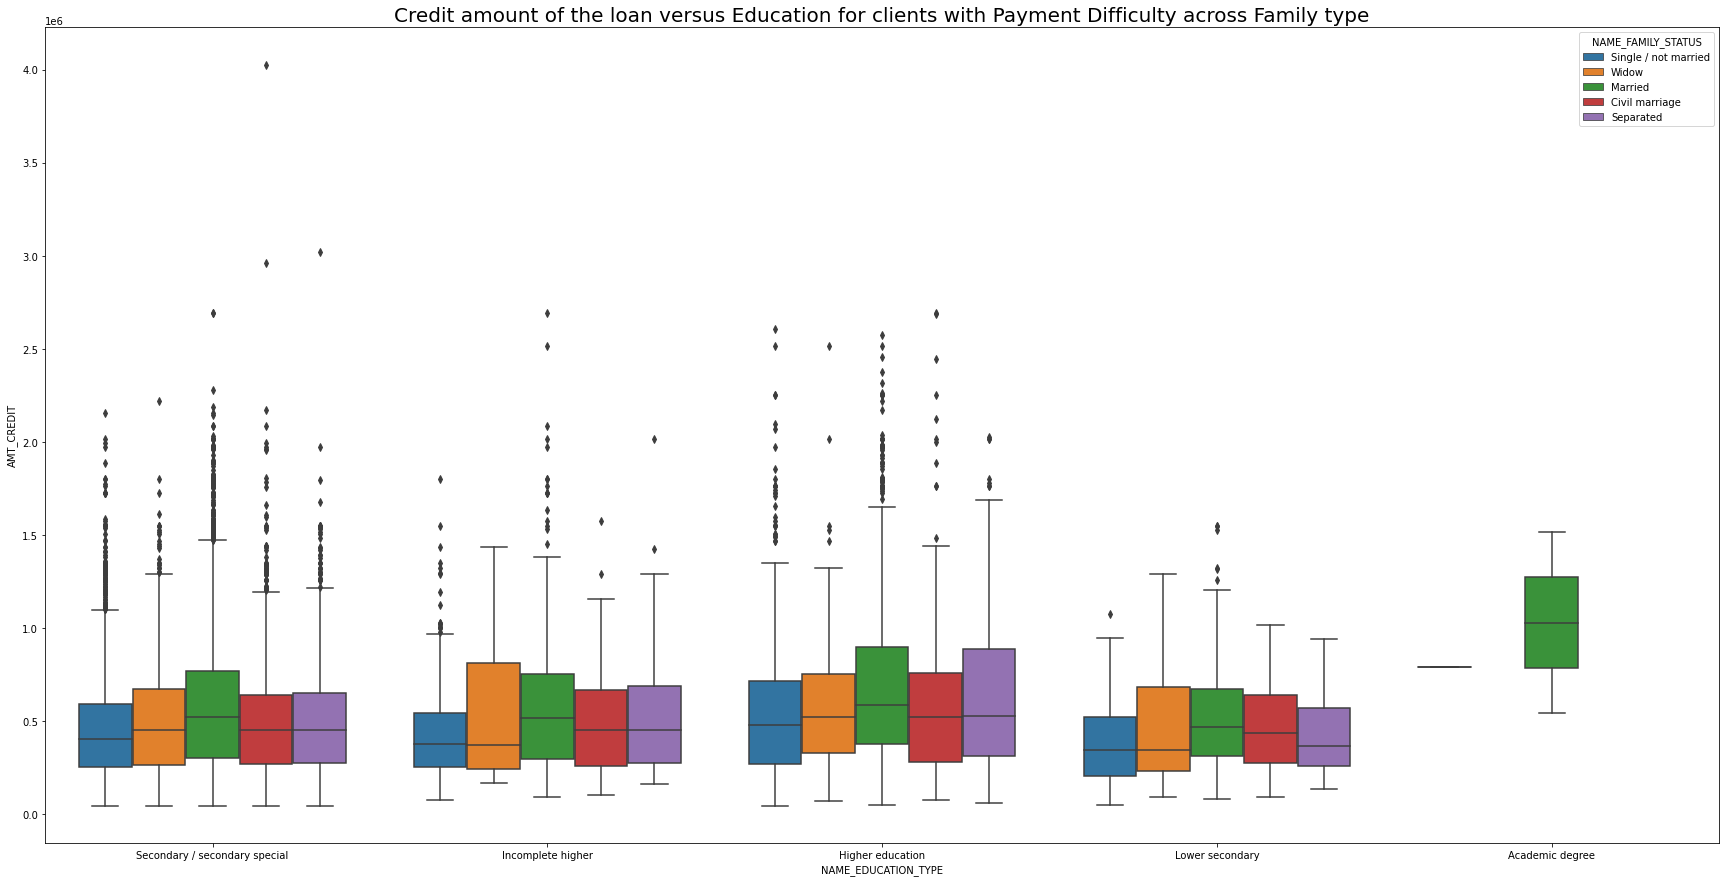

In [142]:
plt.figure(figsize=[30,15])
plt.title("Credit amount of the loan versus Education for clients with Payment Difficulty across Family type", fontsize=20)
sns.boxplot(data=df_target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',hue='NAME_FAMILY_STATUS')
plt.show()

- The Median loan ammount credit appears to be less for clients with Payment Difficulties across all three categories.
- It is also observed that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others for clients with No Payment Difficulties. 
- Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

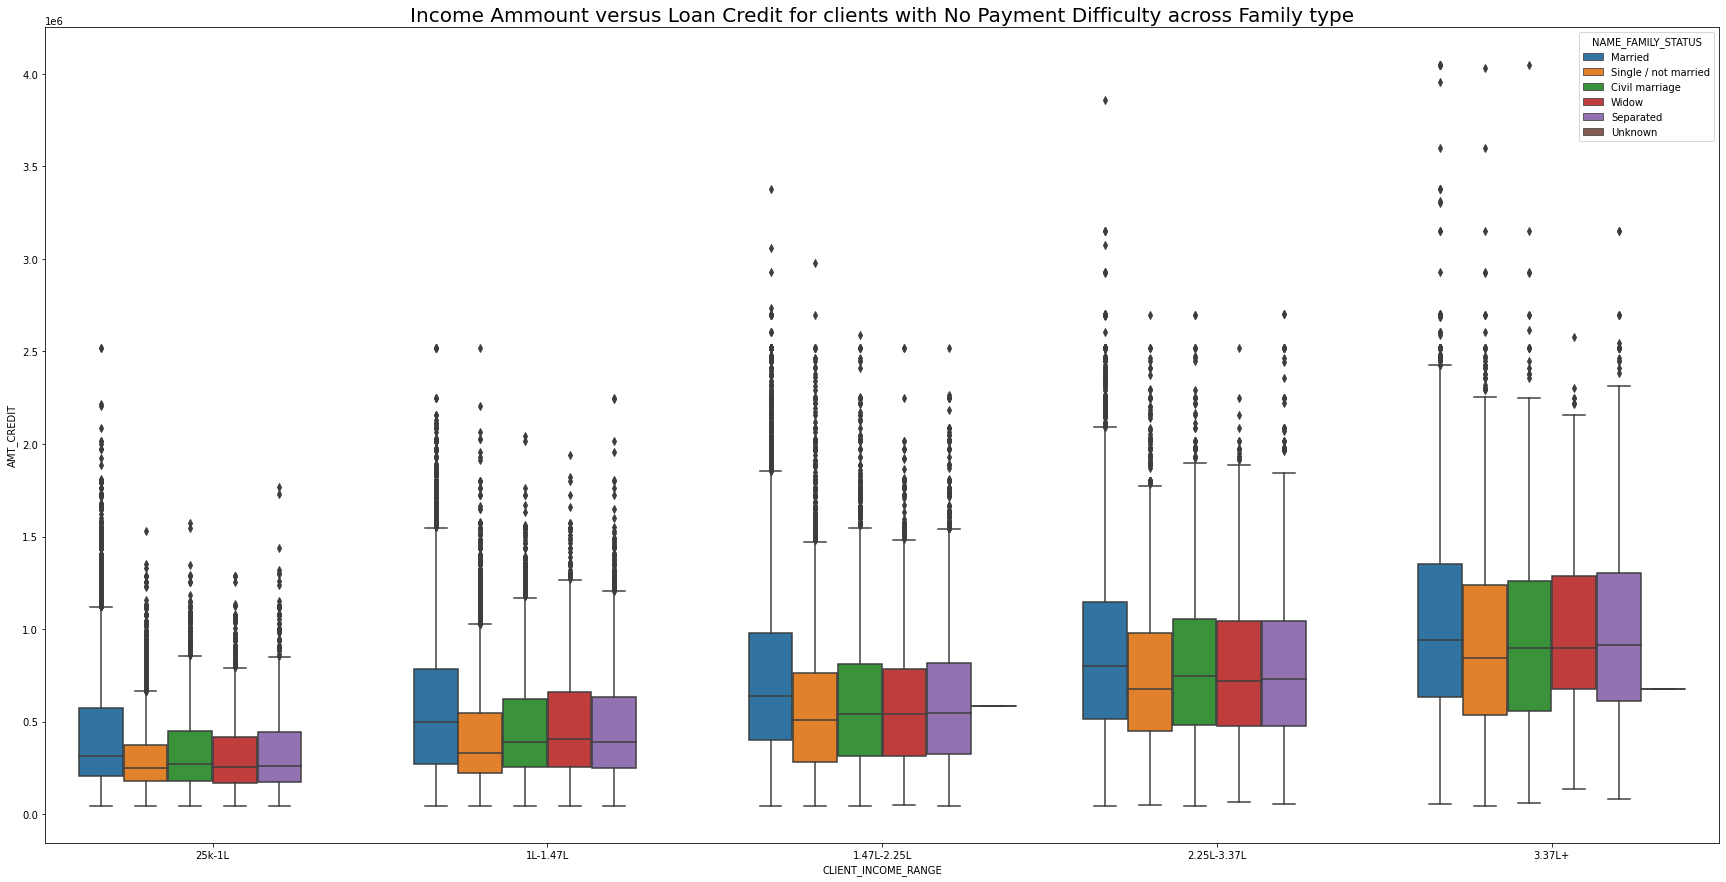

In [143]:
plt.figure(figsize=[30,15])
plt.title("Income Ammount versus Loan Credit for clients with No Payment Difficulty across Family type", fontsize=20)
sns.boxplot(data=df_target0, x='CLIENT_INCOME_RANGE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')
plt.show()

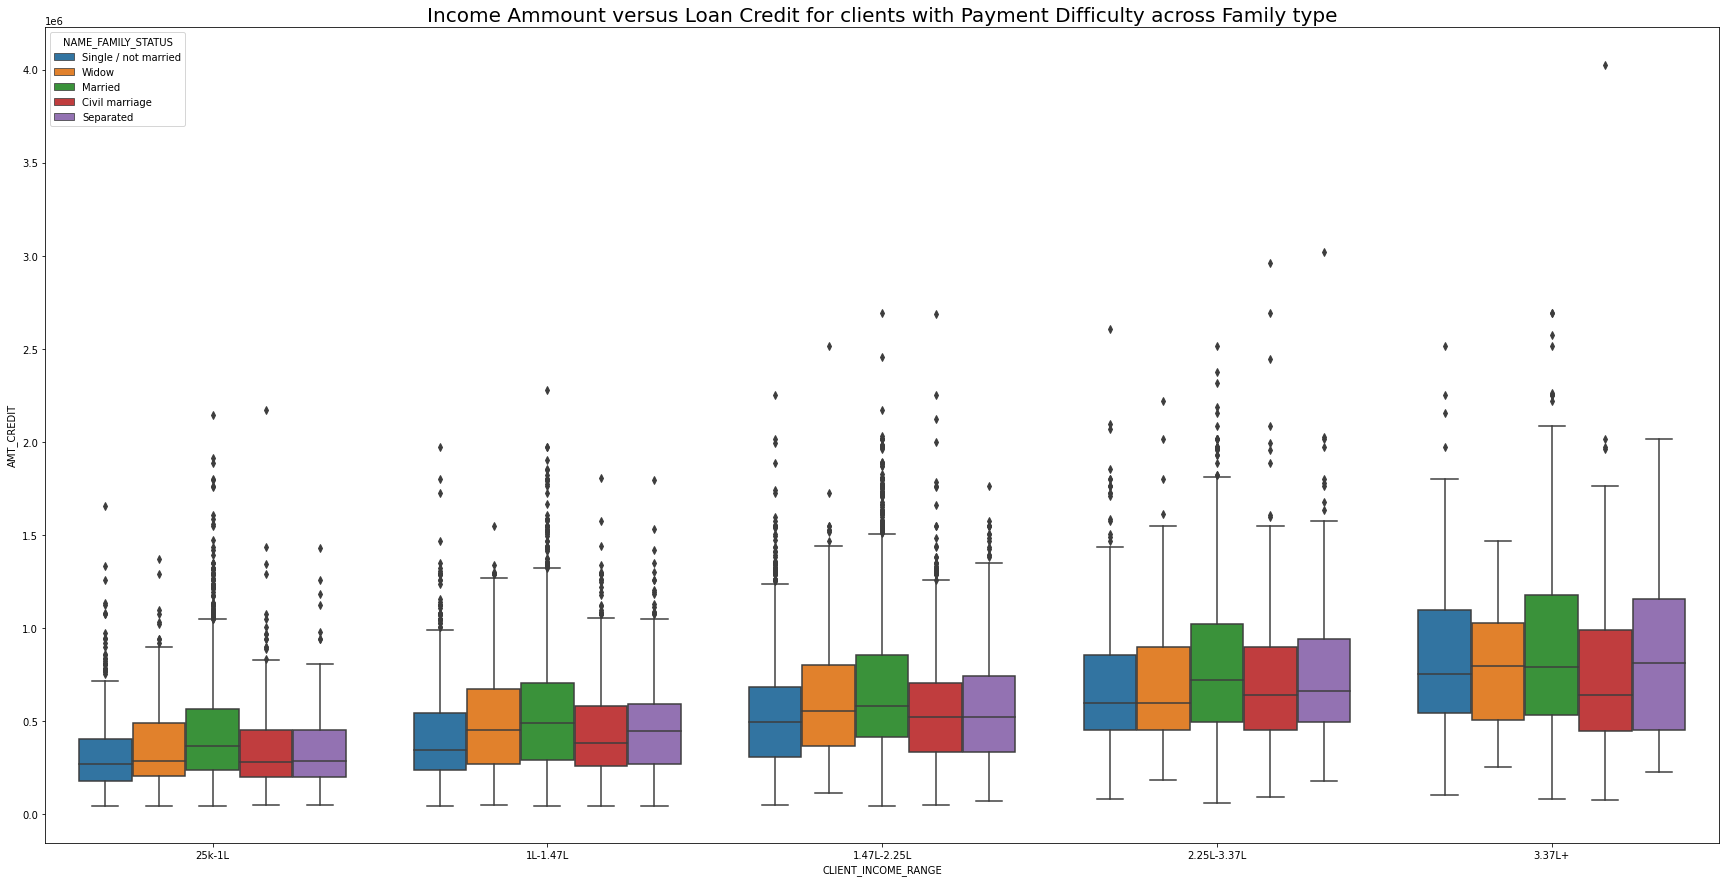

In [144]:
plt.figure(figsize=[30,15])
plt.title("Income Ammount versus Loan Credit for clients with Payment Difficulty across Family type", fontsize=20)
sns.boxplot(data=df_target1, x='CLIENT_INCOME_RANGE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')
plt.show()

- Both the charts appears to be quite same, but married people have significanly higher loan amount credit across all income range and family type.

## Loading the Dataset (2 of 2)

In [145]:
df_prev_application_data = pd.read_csv("previous_application.csv")

In [146]:
df_prev_application_data.shape

(1670214, 37)

We are only taking cases whose SK_ID_CRR is present in application_data.csv

In [147]:
filtered_prev_application_data = df_prev_application_data[df_prev_application_data['SK_ID_CURR'].isin(appli_data_filtered['SK_ID_CURR'])].copy()

In [148]:
#Checking if it contains multiple entries for the same person
filtered_prev_application_data.SK_ID_CURR.duplicated().value_counts(normalize=True)*100

True     79.4117
False    20.5883
Name: SK_ID_CURR, dtype: float64

In [149]:
filtered_prev_application_data.shape

(1413701, 37)

In [150]:
df_combined_application_data = pd.merge(appli_data_filtered, filtered_prev_application_data, on='SK_ID_CURR', how='right')

In [151]:
df_combined_application_data.shape

(1413701, 112)

In [152]:
df_combined_application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_INCOME_RANGE,CLIENT_AGE_YRS,CLIENT_AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,271877,0,Cash loans,Female,No,Yes,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,7392,8447,4120,Yes,Yes,No,Yes,Yes,No,Core staff,3.0,1,1,TUESDAY,17,Same,Different,Different,Same,Same,Same,Military,0.683797,NaN,3.0,0.0,3.0,0.0,548.0,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,1.47L-2.25L,39,30-40,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,108129,0,Revolving loans,Female,No,No,0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21335,1255,5455,4263,Yes,Yes,No,Yes,No,No,Private service staff,2.0,2,2,SUNDAY,10,Same,Same,Same,Same,Same,Same,Self-employed,0.663524,NaN,0.0,0.0,0.0,0.0,517.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,25k-1L,58,50-60,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,122040,0,Cash loans,Female,No,Yes,3,40500.0,284400.0,16456.5,225000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025164,10541,1177,1673,1964,Yes,Yes,No,Yes,No,No,Core staff,5.0,2,2,TUESDAY,9,Same,Same,Same,Same,Same,Same,Postal,0.250565,NaN,4.0,1.0,4.0,0.0,301.0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,25k-1L,28,<30,2523466,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the ba

In [153]:
df_combined_application_data['NAME_CASH_LOAN_PURPOSE'].unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses',
       'Building a house or an annex', 'Other',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Journey', 'Car repairs', 'Furniture',
       'Buying a garage', 'Business development', 'Hobby',
       'Wedding / gift / holiday', 'Gasification / water supply',
       'Refusal to name the goal', 'Money for a third person'],
      dtype=object)

In [154]:
df_combined_application_data['CODE_REJECT_REASON'].unique()

array(['XAP', 'HC', 'LIMIT', 'SCOFR', 'CLIENT', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [155]:
df_combined_application_data['NAME_CLIENT_TYPE'].unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [156]:
df_combined_application_data['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

#### Replacing all XNA and XAP's with np.NAN

In [157]:
df_combined_application_data.replace(['XNA','XAP'],[np.NaN,np.NaN],inplace=True)

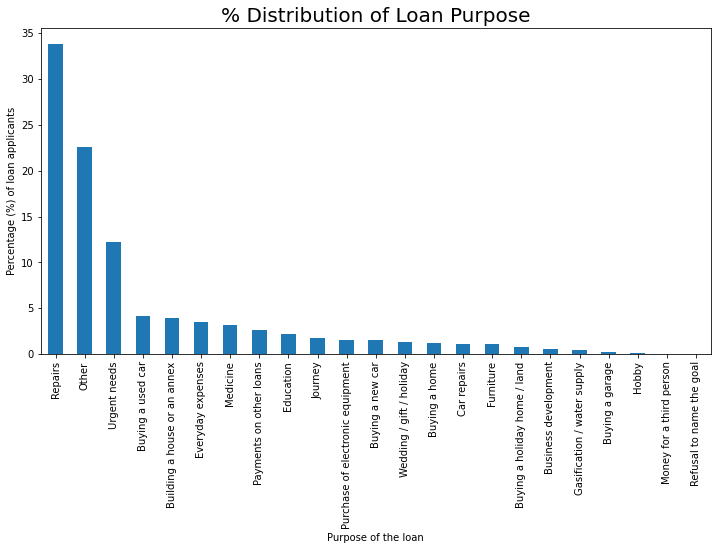

In [158]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Loan Purpose", fontsize=20)
plt.xlabel('Purpose of the loan')
plt.ylabel('Percentage (%) of loan applicants')
(df_combined_application_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

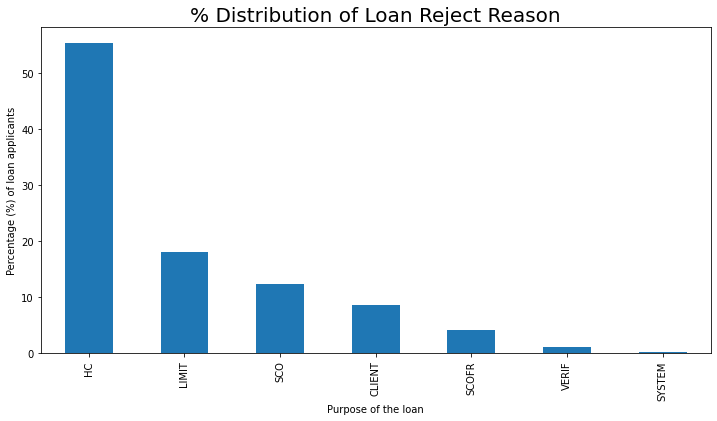

In [159]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Loan Reject Reason", fontsize=20)
plt.xlabel('Purpose of the loan')
plt.ylabel('Percentage (%) of loan applicants')
(df_combined_application_data['CODE_REJECT_REASON'].value_counts(normalize=True)*100).plot.bar()
plt.show()

#### Segmenting df_combined_application_data into 2 separate dataframes i.e target 0 and target 1 and analysing their behaviours.

In [160]:
df_comb_appli_target0 = df_combined_application_data[df_combined_application_data['TARGET'] == 0].copy()
df_comb_appli_target0.shape

(1291341, 112)

In [161]:
df_comb_appli_target1 = df_combined_application_data[df_combined_application_data['TARGET'] == 1].copy()
df_comb_appli_target1.shape

(122360, 112)

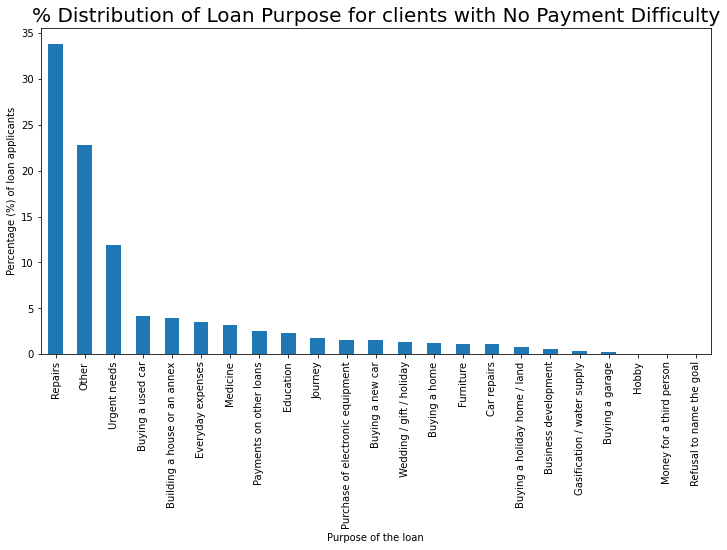

In [162]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Loan Purpose for clients with No Payment Difficulty", fontsize=20)
plt.xlabel('Purpose of the loan')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target0['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

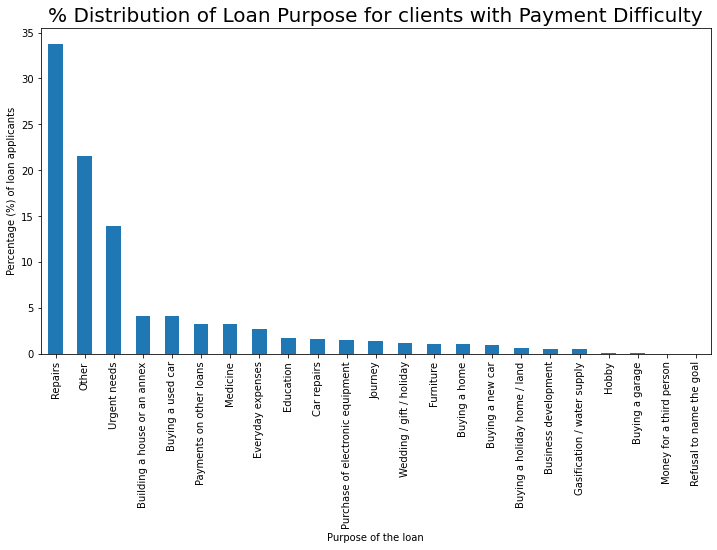

In [163]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Loan Purpose for clients with Payment Difficulty", fontsize=20)
plt.xlabel('Purpose of the loan')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target1['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

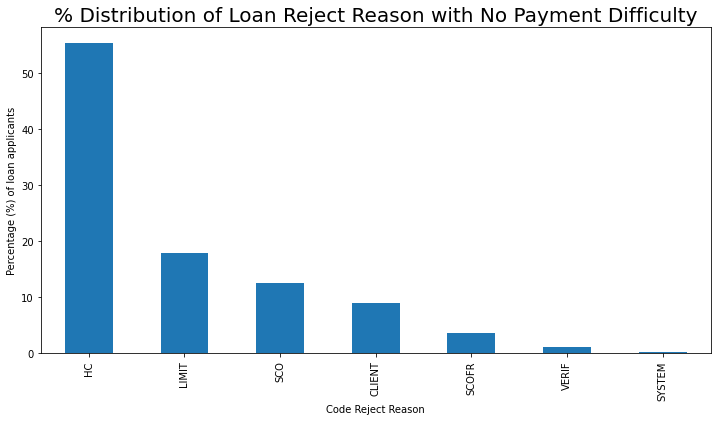

In [164]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Loan Reject Reason with No Payment Difficulty", fontsize=20)
plt.xlabel('Code Reject Reason')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target0['CODE_REJECT_REASON'].value_counts(normalize=True)*100).plot.bar()
plt.show()

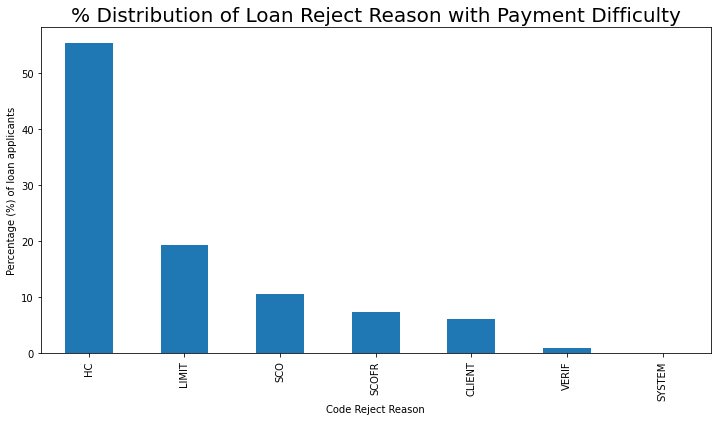

In [165]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Loan Reject Reason with Payment Difficulty", fontsize=20)
plt.xlabel('Code Reject Reason')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target1['CODE_REJECT_REASON'].value_counts(normalize=True)*100).plot.bar()
plt.show()

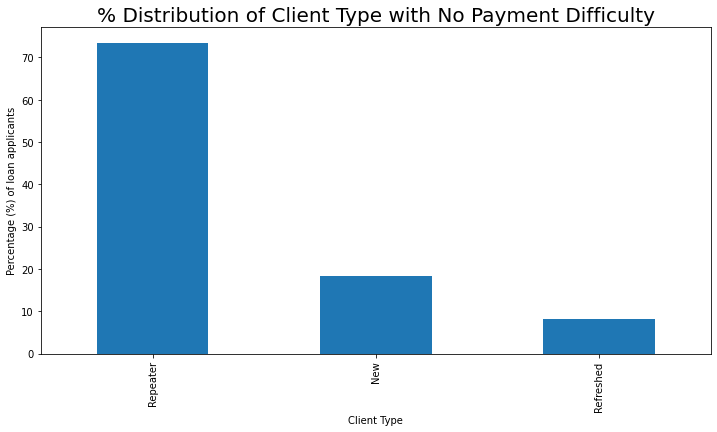

In [166]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Client Type with No Payment Difficulty", fontsize=20)
plt.xlabel('Client Type')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target0['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

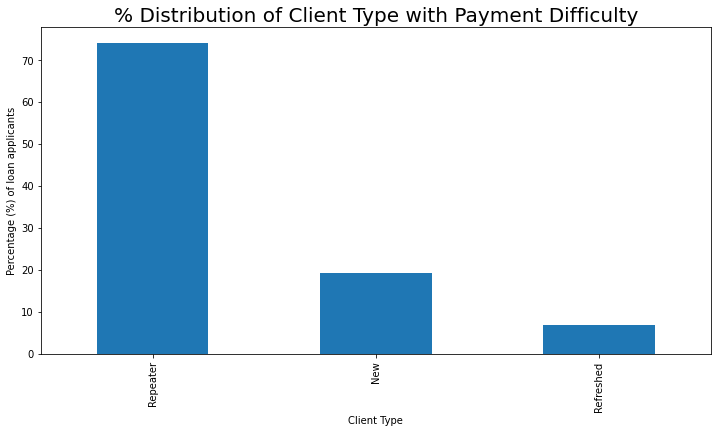

In [167]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Client Type with Payment Difficulty", fontsize=20)
plt.xlabel('Client Type')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target1['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.show()

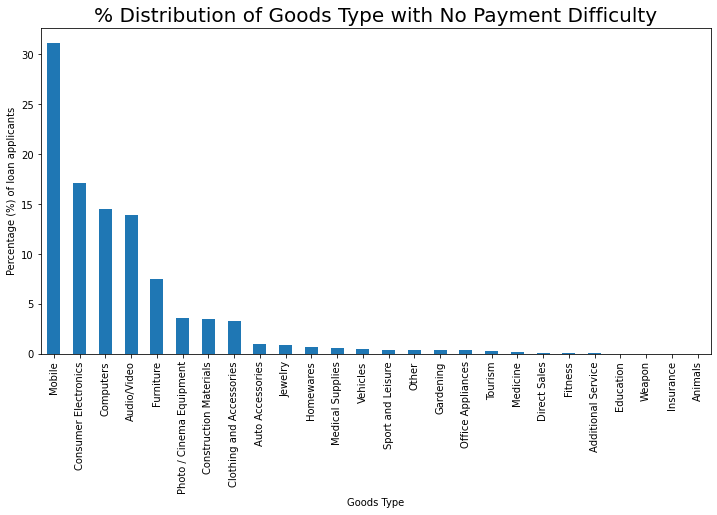

In [168]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Goods Type with No Payment Difficulty", fontsize=20)
plt.xlabel('Goods Type')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target0['NAME_GOODS_CATEGORY'].value_counts(normalize=True)*100).plot.bar()
plt.show()

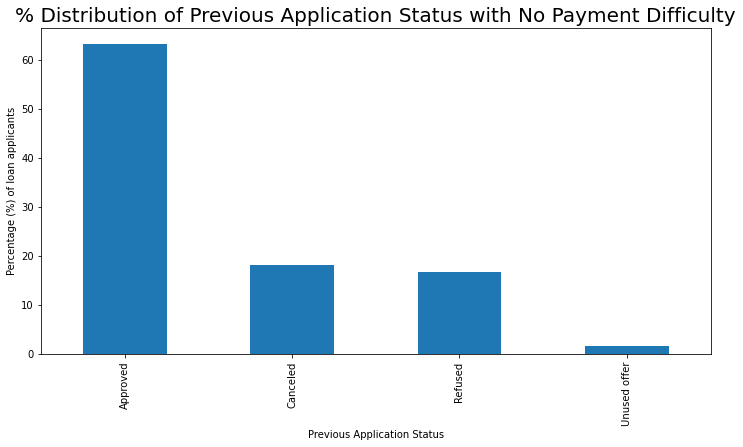

In [169]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Previous Application Status with No Payment Difficulty", fontsize=20)
plt.xlabel('Previous Application Status')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target0['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100).plot.bar()
plt.show()

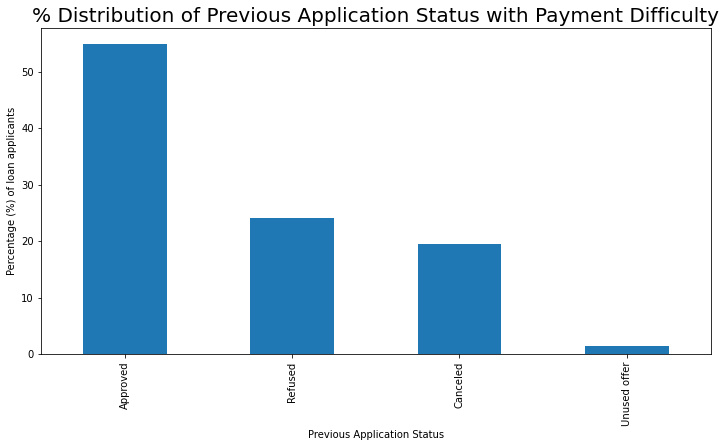

In [170]:
plt.figure(figsize=[12,6])
plt.title("% Distribution of Previous Application Status with Payment Difficulty", fontsize=20)
plt.xlabel('Previous Application Status')
plt.ylabel('Percentage (%) of loan applicants')
(df_comb_appli_target1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100).plot.bar()
plt.show()